# Business Problem

The company is facing issues with product delivery delays to customers. There are too many cases where products are not reaching customers on time, which has a negative impact on customer satisfaction, the company's reputation, and customer retention rates. The company aims to address this problem in order to improve customer satisfaction, maintain its reputation, and optimize operational efficiency.




**Objective Analysis :**

1. Identify the factors contributing to product delivery delays.
2. Analyze the relationship between these factors and the level of delivery delays.

<!-- The objective is to reduce the number of cases where products do not reach customers on time, thereby improving customer satisfaction and loyalty. -->

The objective of this project is to identify the causes of products not being delivered on time to customers, thereby improving customer satisfaction and loyalty.

<!-- mengidentifikasi faktor-faktor utama yang mempengaruhi pengiriman tepat waktu produk dan mengembangkan strategi untuk meningkatkan kinerja pengiriman secara keseluruhan. Tujuan adalah mengurangi jumlah kasus di mana produk tidak sampai tepat waktu kepada pelanggan, sehingga meningkatkan kepuasan dan loyalitas pelanggan. -->

<!-- Apakah mode pengiriman mempengaruhi tingkat kecepatan pengiriman ?

Apakah warehouse block mempengaruhi tingkat kecepatan pengiriman?

Apakah ada perbedaan diskon yang ditawarkan (Discount_offered) pada tingkat kecepatan pengiriman?

Apakah ada perbedaan significant antara berat produk pada kecepatan pengiriman"?

Algoritma Machine Learning apa yang terbaik antara XGBoost dan LightGBM?  -->

# install and import

In [1533]:
# install xgboost
!pip install xgboost

In [1534]:
!pip install lightgbm

In [1535]:
!pip install pingouin

In [1536]:
#===== Set Up Library =====
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import train_test_split


In [1537]:
from sklearn.metrics import confusion_matrix

In [1538]:
from sklearn.metrics import ConfusionMatrixDisplay

In [1539]:
from sklearn.metrics import classification_report

In [1540]:
from sklearn.model_selection import GridSearchCV

In [1541]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [1542]:
from scipy import stats
import pingouin as pg

In [1543]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

# Load Data

Dataset : https://www.kaggle.com/datasets/prachi13/customer-analytics

In [1544]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1545]:
# adjust the path accordingly
df_1 = pd.read_csv('/content/drive/MyDrive/tugas dibimbing/extra class 5 essambling/Train.csv')
df_shipping=df_1.copy()

In [1546]:
df_shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Dictionary :

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# Standard Data Cleansing

In [1547]:
# general dataframe information
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Observation
1. The data consists of 10.999 rows and 12 columns

### Check Null and Missing Values

In [1548]:
data_null = df_shipping.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df_shipping))*100,3)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


Observation:
  * There are not missing values found in some columns

### Duplicated data check

In [1549]:
# duplicated rows check
df_shipping.duplicated().sum()

0

In [1550]:
df_shipping.duplicated(subset='ID').sum()

0

Observation:
  * No duplicated data found

In [1551]:
from prettytable import PrettyTable

# Define the column titles and corresponding values
columns = ['missingvalues', 'duplicatedata']
values = ['No missing values', 'No duplicate data']

# Create a PrettyTable object
table = PrettyTable(columns)

# Add rows to the table
table.add_row(values)

# Display the table
print(table)


+-------------------+-------------------+
|   missingvalues   |   duplicatedata   |
+-------------------+-------------------+
| No missing values | No duplicate data |
+-------------------+-------------------+


<!-- ### Drop unused feature -->

# **EDA (Exploratory Data Analysis)**

### Data understanding

In [1553]:
# Dividing column names based on data type
numericals = df_shipping.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df_shipping.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
categoricals columns are ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [1554]:
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

numericals = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

#### numerical statistical summary

In [1555]:
# numerical statistical summary
df_shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Observation:
* Overall, the minimum and maximum values make sense for each column.
* Mean < Median in the columns `Cost_of_the_Product`, `Weight_in_gms`, `Reached.on.Time_Y.N`, indicating a skew distribution.
* Mean > Median in the columns `Prior_purchases`, `Discount_offered`, indicating a skew distribution.
* `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product` exhibit a normal distribution as the gap between the mean and median is less than 10%.
* The `ID` column serves as the primary key and can be ignored.



#### categorical statistical summary

In [1556]:
# describe method on categorical data
df_shipping[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Observations:

* The majority of customers are female (5545 rows).
* The most preferred shipping method by customers is `Ship` compared to other shipping methods (7462 rows).
* The warehouse block with the highest frequency is block F (3666 rows).
* The most common product importance category is "low" (5297 rows).


In [1557]:
# frequency details for each column
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df_shipping[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------------------


Value counts for column Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------


Value counts for column Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
------------------------------


Value counts for column Gender:
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------




Observation:

In the `Warehouse_block` column, we can see that there are 5 blocks: A, B, C, D, and F, without block E.


### Target Percentage Record

what is the target?

In [1558]:
target=df_shipping['Reached.on.Time_Y.N'].value_counts(normalize=True)*100
target

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

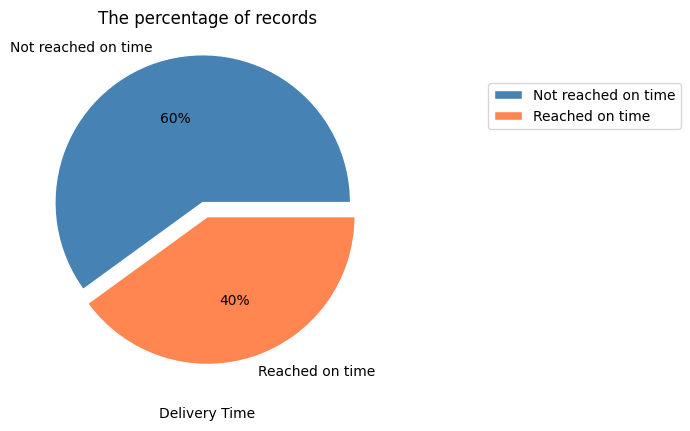

In [1560]:
color = ["steelblue", "#FF8551"]
labels = ['Not reached on time', 'Reached on time']


target = [60, 40]
plt.pie(target, labels=labels, autopct='%1.0f%%', colors=color, explode=(0.1, 0), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(loc='right', bbox_to_anchor=(1.8, 0.8))
plt.title("The percentage of records")
plt.xlabel("Delivery Time")
plt.show()

The 'not reached on time' shipments (value 1) are more common than the 'reached on time' shipments (value 0), with approximately 20% more occurrences.

<!-- The 'not reached on time' shipments (nilai 1) lebih umum daripada 'reached on time' shipments (nilai 0), dengan perbandingan sekitar 10% lebih banyak. terjemahkan ke eng. -->
<!-- The 'not reached on time' shipments are 10% more numerous than the 'reached on time' shipments. -->

### Boxplot to detect outliers

In [1562]:
# Dividing column names based on data type
numericals = df_shipping.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df_shipping.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
categoricals columns are ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


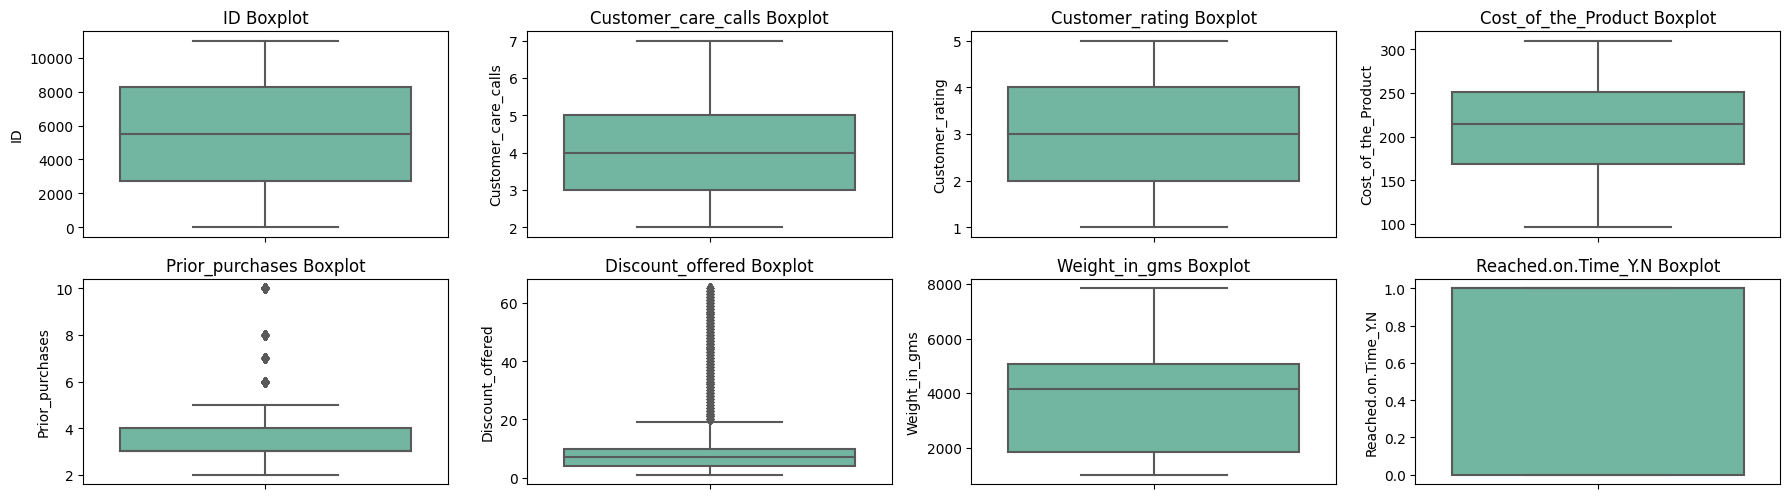

In [1563]:
numericals = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
# adjust the figure size for better readability
plt.figure(figsize=(18,10))

# plotting
features = numericals

features = numericals
for i in range(0, len(features)):
    plt.subplot(len(features)//2, 4, i+1)
    sns.boxplot(y=df_shipping[features[i]], palette='Set2')
    plt.title("{} Boxplot".format(features[i]))
    plt.tight_layout()

Observation:
1. There are outliers in the columns `Prior_purchases`, `Discount_offered`,and `Discount_Perc`.
2. The outliers are still considered reasonable and we will not remove them.



In [1565]:
def check_outlier_x(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                 else 'not-outlier' for x in data[column].values]

##### outlier Prior_purchases

In [1566]:
df_update=df_shipping.copy()

In [1567]:
df_update['outlier_prior_pc'] = check_outlier_x(data=df_update, column='Prior_purchases')

In [1568]:
df_update[df_update['outlier_prior_pc'] == 'outlier'].head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,outlier_prior_pc
37,38,F,Ship,2,4,181,6,medium,F,16,3605,1,outlier
62,63,A,Ship,5,1,105,6,medium,M,62,1292,1,outlier
74,75,A,Ship,6,1,238,6,low,F,13,2442,1,outlier
90,91,D,Ship,5,3,174,6,high,F,41,1085,1,outlier
133,134,F,Flight,5,4,280,6,medium,F,51,3582,1,outlier


In [1569]:
outlier_ppc=df_update[df_update['outlier_prior_pc'] == 'outlier']

In [1570]:
outlier_ppc['Prior_purchases'].unique()

array([ 6,  7, 10,  8])

Observation:

<!-- - outlier disini adalah merujuk pada informasi mengenai berapa kali pelanggan telah melakukan pembelian sebelumnya dimana pelanggan yang melakukan pembelian lebih dari 5 kali dianggap outlier. -->
Outlier here refers to the information about how many times a customer has made prior purchases, where customers who have made more than 5 purchases are considered outliers.


##### outlier Discount_offered

In [1571]:
df_update['outlier_discount_off'] = check_outlier_x(data=df_update, column='Discount_offered')

In [1572]:
df_update[df_update['outlier_discount_off'] == 'outlier'].head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,outlier_prior_pc,outlier_discount_off
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,not-outlier,outlier
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,not-outlier,outlier
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,not-outlier,outlier
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,not-outlier,outlier
7,8,F,Flight,4,1,233,2,low,F,48,2804,1,not-outlier,outlier


In [1573]:
outlier_do=df_update[df_update['outlier_discount_off'] == 'outlier']

In [1574]:
outlier_do['Discount_offered'].min()

20

In [1575]:
outlier_do['Discount_offered'].max()

65

Observation:

Outlier here refers to the amount of discount. Where if the discount amount is greater than or equal to 20, it will be detected as an outlier.

 <!-- outlier disini merujuk pada jumlah diskon. Dimana jika jumlah diskon lebih atau sama dengan 20 maka akan dideteksi sebagai outlier -->

### KDE plot for knowing the  numerical distribution form

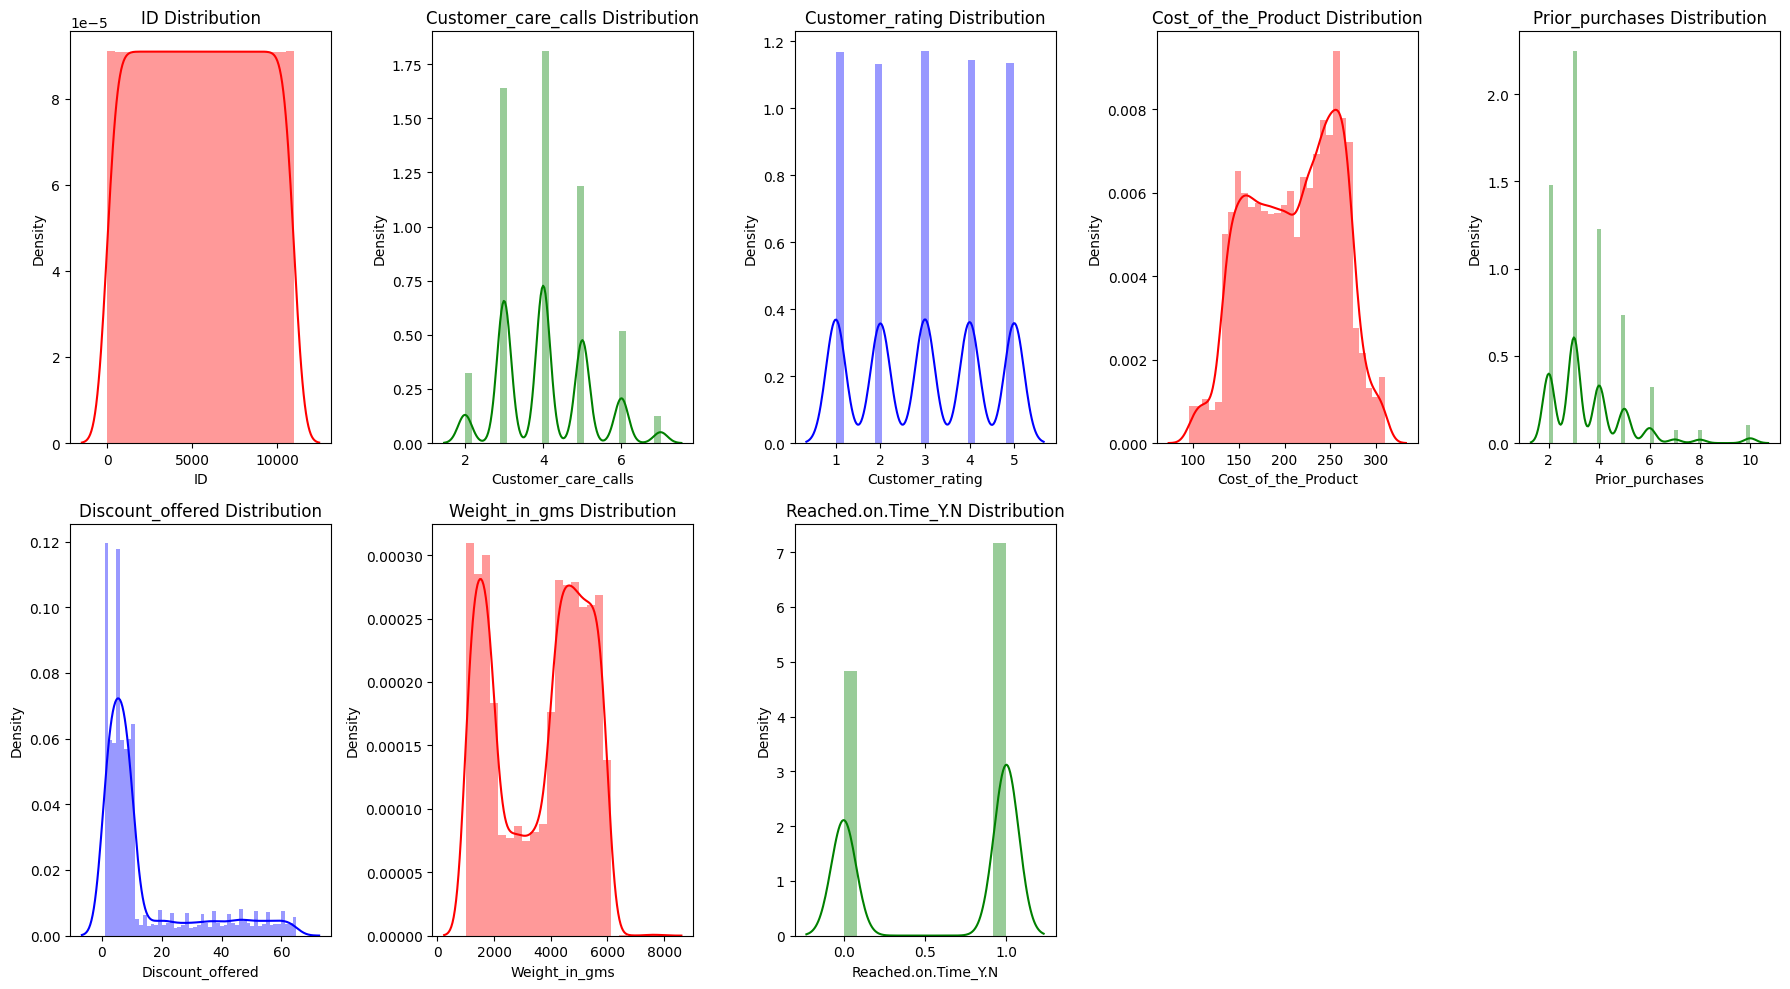

In [1576]:
import colorsys
# adjust the figure size for better readability

plt.figure(figsize=(18,10))

feat_num=numericals
colors=['red','green','blue']
for i in range(0, len(feat_num)):
    plt.subplot(2, len(feat_num)//2 +1, i+1)
    sns.distplot(x=df_shipping[feat_num[i]], color=colors[i % len(colors)])
    plt.xlabel(feat_num[i])
    plt.title("{} Distribution".format(feat_num[i]))
    plt.tight_layout()

Observation:

1. In the first observation, we concluded that Customer_care_calls, Customer_rating, and Cost_of_the_Product have a symmetric distribution. However, from the KDE plot, it can be seen that Customer_care_calls, Customer_rating, and Cost_of_the_Product exhibit a multimodal distribution.




### Hypotesis Testing

<!-- ### Apakah warehouse block mempengaruhi tingkat kecepatan pengiriman? -->

<!-- ### Does the warehouse block affect the rate of delivery delays ? -->
#### Does the warehouse block affect the on-time delivery rate?

<!-- Apakah warehouse block mempengaruhi tingkat keterlambatan pengiriman not reach on time? -->

Does the warehouse block affect the rate of delivery delays?

Analysis:

H0: The warehouse block affects the on-time delivery rate.

H1: The warehouse block does not affect the on-time delivery rate.

##### chi square test

In [1577]:
from scipy.stats import chi2_contingency

In [1578]:
contingency_table = pd.crosstab(df_shipping['Warehouse_block'], df_shipping['Reached.on.Time_Y.N'])

In [1579]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Warehouse block and Reached on time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Warehouse block and Reached on time.")

Chi-Square: 1.0893868307263042
p-value: 0.8959524278243698
Degrees of Freedom: 4
Expected Frequencies:
 [[ 739.2661151  1093.7338849 ]
 [ 739.2661151  1093.7338849 ]
 [ 739.2661151  1093.7338849 ]
 [ 739.66942449 1094.33057551]
 [1478.5322302  2187.4677698 ]]
Fail to reject the null hypothesis. There is no significant relationship between Warehouse block and Reached on time.


Fail to reject the null hypothesis. There is no significant relationship between Warehouse block and Reached on time.

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does the Mode of Shipment Influence the On-Time Delivery Speed?

##### chi square test

In [1581]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Mode_of_Shipment'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Mode of Shipment and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Mode of Shipment and Reached on Time.")


Chi-Square: 0.7434357246718558
p-value: 0.6895487627593786
Fail to reject the null hypothesis. There is no significant relationship between Mode of Shipment and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

There is no significant relationship between Mode of Shipment and Reached on Time.

<!-- Bagaimana weight category pada masing-masing product importance? -->

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does Customer care calls Influence the On-Time Delivery Speed?

##### chi square test

In [1582]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Customer_care_calls'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Customer_care_calls and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Customer_care_calls and Reached on Time.")


Chi-Square: 54.27373399881683
p-value: 1.8411500205173969e-10
Reject the null hypothesis. There is a significant relationship between Customer_care_calls and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

**There is a significant relationship between Customer care calls and Reached on Time.**

<!-- Bagaimana weight category pada masing-masing product importance? -->

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does Customer ratings Influence the On-Time Delivery Speed?

##### chi square test

In [1583]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Customer_rating'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Customer_rating and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Customer_rating and Reached on Time.")


Chi-Square: 3.200045474831146
p-value: 0.5249236018493662
Fail to reject the null hypothesis. There is no significant relationship between Customer_rating and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

There is no significant relationship between Customer_rating and Reached on Time.

<!-- Bagaimana weight category pada masing-masing product importance? -->

 #### Does the Cost of the product Influence the On-Time Delivery Speed?

##### T-test

H0 :  There is no significant difference in the mean 'Cost_of_the_Product' between products that reached their destination on time (Reached.on.Time_Y.N = 0) and products that did not reach their destination on time (Reached.on.Time_Y.N = 1).

H1 :  There is a significant difference in the mean 'Cost_of_the_Product' between products that reached their destination on time (Reached.on.Time_Y.N = 0) and products that did not reach their destination on time (Reached.on.Time_Y.N = 1).

In [1584]:
reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]
not_reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]

In [1585]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(reached_on_time['Cost_of_the_Product'], not_reached_on_time['Cost_of_the_Product'])
alpha = 0.05
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean 'Cost_of_the_Product' between  products that reached on time and those that did not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean 'Cost_of_the_Product' between  products that reached on time and those that did not.")

T-test statistic: 7.737818128158982
P-value: 1.099885972621861e-14
Reject the null hypothesis. There is a significant difference in the mean 'Cost_of_the_Product' between  products that reached on time and those that did not.


 **There is a significant difference in the mean 'Cost_of_the_Product' between  products that reached on time and those that did not.**

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does Prior Purchase Influence the On-Time Delivery Speed?

##### chi square test

In [1587]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Prior_purchases'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Prior_purchases and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Prior_purchases	 and Reached on Time.")


Chi-Square: 125.9220708194259
p-value: 4.4645971837938025e-24
Reject the null hypothesis. There is a significant relationship between Prior_purchases and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

**There is a significant relationship between Prior_purchases and Reached on Time.**

<!-- Bagaimana weight category pada masing-masing product importance? -->

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does Product_importance Influence the On-Time Delivery Speed?

##### chi square test

In [1588]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Product_importance'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product_importance and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product_importance and Reached on Time.")


Chi-Square: 12.211163824831024
p-value: 0.002230383104745087
Reject the null hypothesis. There is a significant relationship between Product_importance and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

**There is a significant relationship between Product_importance and Reached on Time.**

<!-- Bagaimana weight category pada masing-masing product importance? -->

 #### Does the Discount offered Influence the On-Time Delivery Speed?

##### T-test

H0 :  There is no significant difference in the mean 'Discount offered' between products that reached their destination on time (Reached.on.Time_Y.N = 0) and products that did not reach their destination on time (Reached.on.Time_Y.N = 1).

H1 :  There is a significant difference in the mean 'Discount offered' between products that reached their destination on time (Reached.on.Time_Y.N = 0) and products that did not reach their destination on time (Reached.on.Time_Y.N = 1).

In [1589]:
reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]
not_reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]

In [1590]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(reached_on_time['Discount_offered'], not_reached_on_time['Discount_offered'])
alpha = 0.05
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean 'Discount_offered' between  products that reached on time and those that did not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean 'Discount_offered' between  products that reached on time and those that did not.")

T-test statistic: -45.3744750332705
P-value: 0.0
Reject the null hypothesis. There is a significant difference in the mean 'Discount_offered' between  products that reached on time and those that did not.


 **There is a significant difference in the mean 'Discount_offered' between  products that reached on time and those that did not.**

 #### Does the Weight Influence the On-Time Delivery Speed?

##### T-test

H0 : There was no significant difference in product weight between products that reached their destination on time (Reached.on.Time_Y.N = 0) and products that did not reach their destination on time (Reached.on.Time_Y.N = 1).

H1 : there is a significant difference in product weight between products that reach their destination on time (Reached.on.Time_Y.N = 0) and products that do not reach their destination on time (Reached.on.Time_Y.N = 1).

In [1591]:
reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]
not_reached_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]

In [1592]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(reached_on_time['Weight_in_gms'], not_reached_on_time['Weight_in_gms'])
alpha = 0.05
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean weight between products that reached on time and those that did not.")
else:
    print("Fail reject the null hypothesis. There is no significant difference in the mean weight between products that reached on time and those that did not.")

T-test statistic: 29.264343461838504
P-value: 2.3546582802914183e-181
Reject the null hypothesis. There is a significant difference in the mean weight between products that reached on time and those that did not.


**There is a significant difference in the mean weight between products that reached on time and those that did not.**

 <!-- ### Apakah mode of Shipment mempengaruhi kecepatan tingkat pengiriman tepat waktu? -->

 #### Does GenderInfluence the On-Time Delivery Speed?

##### chi square test

In [1594]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df_shipping['Gender'], columns=df_shipping['Reached.on.Time_Y.N'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret the results
print("Chi-Square:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Gender and Reached on Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Gender and Reached on Time.")


Chi-Square: 0.22307980845395214
p-value: 0.6367032124181522
Fail to reject the null hypothesis. There is no significant relationship between Gender and Reached on Time.


<!-- tidak ada hubungan yang significant antara mode of shipment dan reached on time -->

**There is a significant relationship between Product_importance and Reached on Time.**

<!-- Bagaimana weight category pada masing-masing product importance? -->

#### Conclution of Hypotesis Testing

Fitur-fitur yang mempengaruhi kecepatan pengiriman berdasarkan Hipotesis Testing:

1. Customer care calls
2. Cost of the product
3. Prior purchases
4. Product importance
5. Discount offered
6. Weight in gms

### Product importance based Delivery Speed

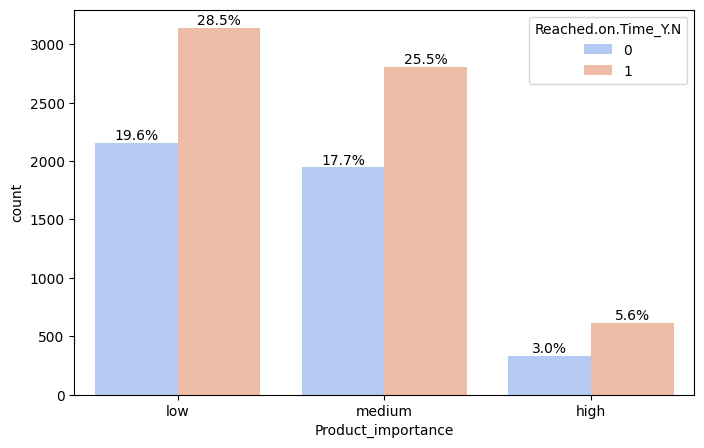

In [1595]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df_shipping['Product_importance'], palette="coolwarm", hue=df_shipping['Reached.on.Time_Y.N'])

# Hitung total untuk setiap kategori
totals = df_shipping.groupby('Product_importance')['Reached.on.Time_Y.N'].count().reset_index()

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    percentage = '{:.1f}%'.format((height / df_shipping.shape[0]) * 100)  # Hitung persentase berdasarkan jumlah total data
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


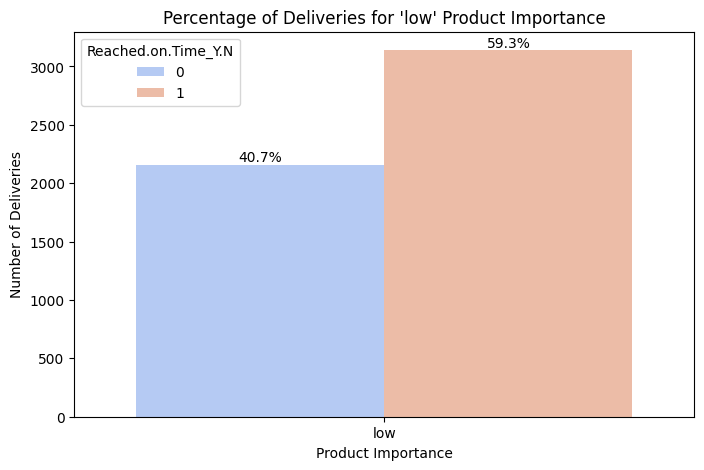

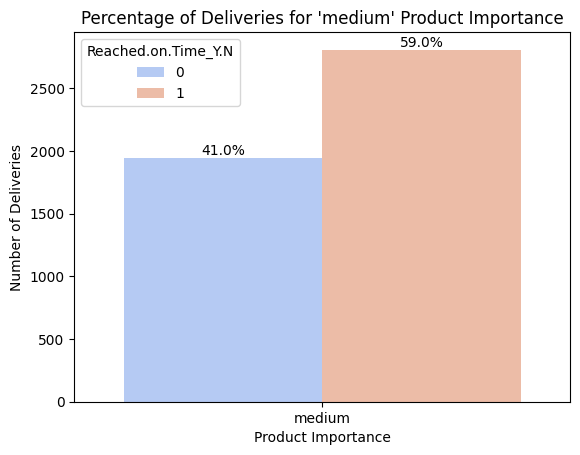

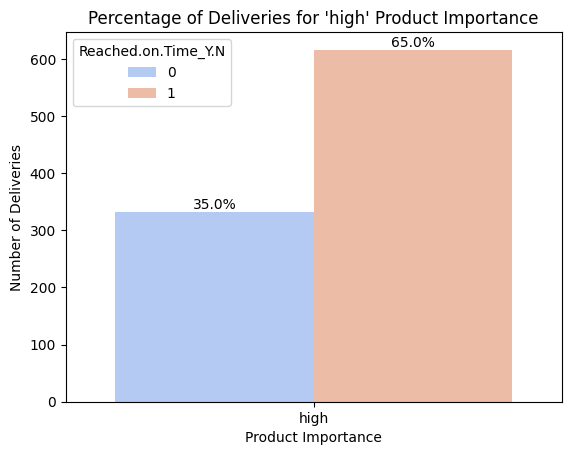

In [1596]:
plt.figure(figsize=(8, 5))

# Filter data hanya untuk kategori 'Low'
low_data = df_shipping[df_shipping['Product_importance'] == 'low']

# Hitung total untuk kategori 'Low'
total_low = len(low_data)

# Plot countplot
ax = sns.countplot(x=low_data['Product_importance'], palette="coolwarm", hue=low_data['Reached.on.Time_Y.N'])

# Annotate persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    percentage = '{:.1f}%'.format((height / total_low) * 100)
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Percentage of Deliveries for 'low' Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Number of Deliveries")
# plt.legend(title='Reached On Time', labels=['No', 'Yes'])
plt.show()

# Filter data hanya untuk kategori 'medium'
low_data = df_shipping[df_shipping['Product_importance'] == 'medium']

# Hitung total untuk kategori 'Low'
total_low = len(low_data)

# Plot countplot
ax = sns.countplot(x=low_data['Product_importance'], palette="coolwarm", hue=low_data['Reached.on.Time_Y.N'])

# Annotate persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    percentage = '{:.1f}%'.format((height / total_low) * 100)
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Percentage of Deliveries for 'medium' Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Number of Deliveries")
plt.show()

# Filter data hanya untuk kategori 'high'
low_data = df_shipping[df_shipping['Product_importance'] == 'high']

# Hitung total untuk kategori 'Low'
total_low = len(low_data)

# Plot countplot
ax = sns.countplot(x=low_data['Product_importance'], palette="coolwarm", hue=low_data['Reached.on.Time_Y.N'])

# Annotate persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    percentage = '{:.1f}%'.format((height / total_low) * 100)
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Percentage of Deliveries for 'high' Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Number of Deliveries")
# plt.legend(title='Reached On Time', labels=['No', 'Yes'])
plt.show()

<!-- Diantara low, medium, dan high, perbedaan yang cukup significant didapat dari label high dimana produk dengan kepentingan yang tinggi lebih banyak yang tidak tepat waktu dibandingkan yang tepat waktu dengan perbandingan 65% tidak tepat waktu dan 35% yang tepat waktu.  -->

Among low, medium, and high, the most significant difference is observed in the "high" category, where products with high importance are more likely to be delivered late compared to being on time, with a ratio of 65% late deliveries and 35% on-time deliveries.

### What is the weight in grams based Delivery Speed ?

In [1597]:
# Calculate the median weight for deliveries that reached on time (1)
median_weight_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]['Weight_in_gms'].median()

# Calculate the median weight for deliveries that did not reach on time (0)
median_weight_not_on_time = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]['Weight_in_gms'].median()

print("Median weight in grams for deliveries that reached on time:", median_weight_on_time)
print("Median weight in grams for deliveries that did not reach on time:", median_weight_not_on_time)

Median weight in grams for deliveries that reached on time: 3231.0
Median weight in grams for deliveries that did not reach on time: 4674.0


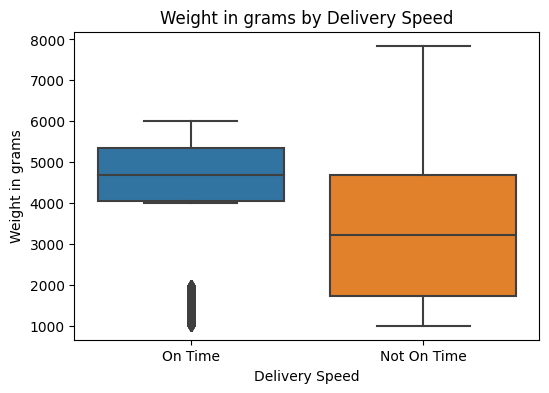

In [1598]:
# Create a boxplot to visualize the median weight by delivery speed
plt.figure(figsize=(6, 4))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df_shipping)
plt.title("Weight in grams by Delivery Speed")
plt.xlabel("Delivery Speed")
plt.ylabel("Weight in grams")
plt.xticks([0, 1], ['On Time', 'Not On Time'])
plt.show()

Products with weights between 1000-2000 grams and 4000 - 6000 grams tend to be
on time, while products with weights between 2000 - 4000 grams and over 6000 grams tend to be not on time.


<!-- ### Berapa rata-rata weight in grams pada product importance yang not reach on time? -->

### What is the median weight in grams for product importance levels that do not reach on time?

In [1599]:
not_reach_in_time_data = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]
average_weight_per_importance = not_reach_in_time_data.groupby('Product_importance')['Weight_in_gms'].median()
print(average_weight_per_importance)

Product_importance
high      3798.0
low       2935.0
medium    3382.0
Name: Weight_in_gms, dtype: float64


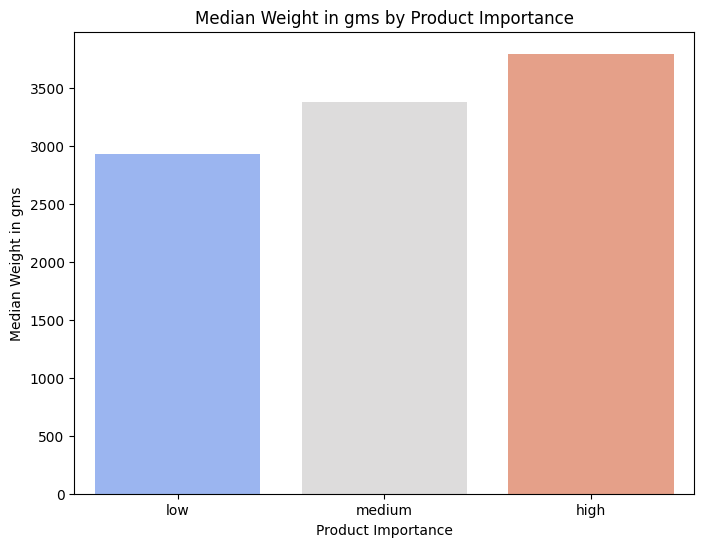

In [1600]:
# Group data by 'Product Importance' and calculate mean weight
not_reach_in_time_data= df_shipping[df_shipping['Reached.on.Time_Y.N'] == 1]
order = ['low','medium','high']
average_weight_per_importance = not_reach_in_time_data.groupby('Product_importance')['Weight_in_gms'].median()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_weight_per_importance.index, y=average_weight_per_importance.values,order=order, palette="coolwarm")
plt.title("Median Weight in gms by Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Median Weight in gms")
plt.show()


<!-- semakin tinggi level kepentingan produk, maka semakin berat barang yang akan dikirim -->

<!-- The higher the product importance level, the heavier the items tend to be shipped. -->

"The median did not reach on time between 2000 - 4000 grams.

<!-- ### Berapa rata-rata weight in grams pada product importance pada reach on time? -->

### What is the median weight in grams for product importance levels for deliveries that reach on time?

In [1601]:
reach_in_time_data = df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]
average_weight_per_importance = reach_in_time_data.groupby('Product_importance')['Weight_in_gms'].median()
print(average_weight_per_importance)

Product_importance
high      4923.5
low       4625.0
medium    4677.0
Name: Weight_in_gms, dtype: float64


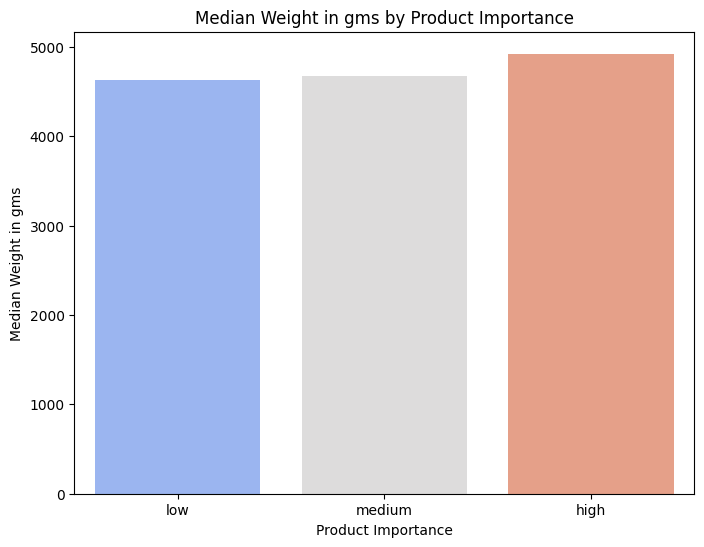

In [1602]:
# Group data by 'Product Importance' and calculate mean weight
reach_in_time_data= df_shipping[df_shipping['Reached.on.Time_Y.N'] == 0]
average_weight_per_importance = reach_in_time_data.groupby('Product_importance')['Weight_in_gms'].median()
order=['low','medium','high']
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=average_weight_per_importance.index, y=average_weight_per_importance.values,order=order, palette="coolwarm")
plt.title("Median Weight in gms by Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Median Weight in gms")
plt.show()


<!-- pada pengiriman yang tepat waktu, berat barang cenderung lebih besar (diatas 4 kg) dibandingkan pada pengiriman tidak tepat waktu. -->

In on-time deliveries, the weight of the items tends to be larger (above 4 kg) compared to items in deliveries that are not on time.

<!-- ### Bagaimana weight category pada masing-masing product importance? -->

### Is there a significant difference in the product importance based on Discount offered in relation to delivery speed?

 <!-- lalu, Apakah product importance di pengaruhi oleh kategori berat pada barang? -->

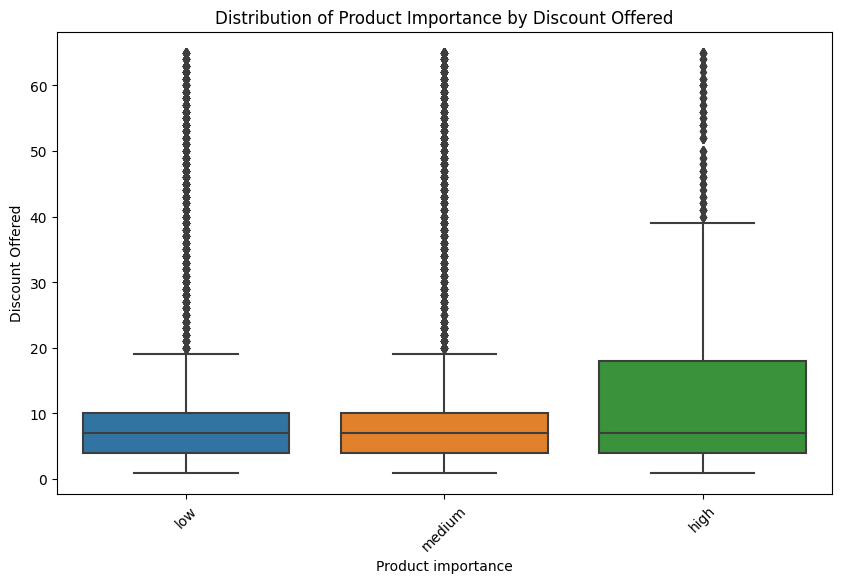

In [1603]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_shipping['Product_importance'], y=df_shipping['Discount_offered'])
plt.xlabel('Product importance')
plt.ylabel('Discount Offered')
plt.title('Distribution of Product Importance by Discount Offered')
plt.xticks(rotation=45)  # Jika Anda ingin memutar label sumbu x
plt.show()

<!-- Product importance high lebih banyak ditawarkan potongan harga discount -->

The product labeled as ‘high’ importance offers more discounts.


### Is there a difference in the Discount_perc based on the level of delivery speed?

#### Pre-Processing

##### add feature : Discount_Perc

In [1604]:
df_shipping['Discount_Perc'] = round((df_shipping['Discount_offered'] / df_shipping['Cost_of_the_Product']) * 100)

In [1605]:
df_shipping['Discount_Perc']=df_shipping['Discount_Perc'].astype(int)

In [1606]:
df_shipping.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,25
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27


<!-- alasan menambah discount_perc : karena asumsi kita bahwa discount_offered dalam usd -->
The reason for adding the discount_perc variable is because we assume that discount_offered is in USD.

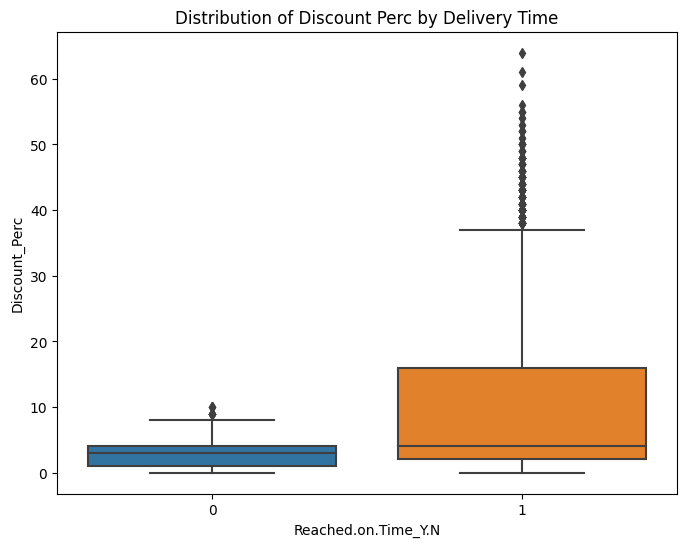

In [1607]:
# Visualization of discount differences between on-time delivery and delayed delivery.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_shipping['Reached.on.Time_Y.N'], y=df_shipping['Discount_Perc'])
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('Discount_Perc')
plt.title('Distribution of Discount Perc by Delivery Time')
plt.show()

Observation:

Products that experience delivery delays tend to receive larger discounts, while products that are delivered on time receive smaller discounts. This suggests that Discount_Perc has a significant impact on the delivery speed. It is possible that customers are more inclined to purchase products when there are substantial discounts available.




<!-- ### Bagaimana weight category pada masing-masing product importance? -->

### Is there a significant difference in Discount Perc  based on Cost of the Product in relation to delivery speed?

 <!-- lalu, Apakah product importance di pengaruhi oleh kategori berat pada barang? -->

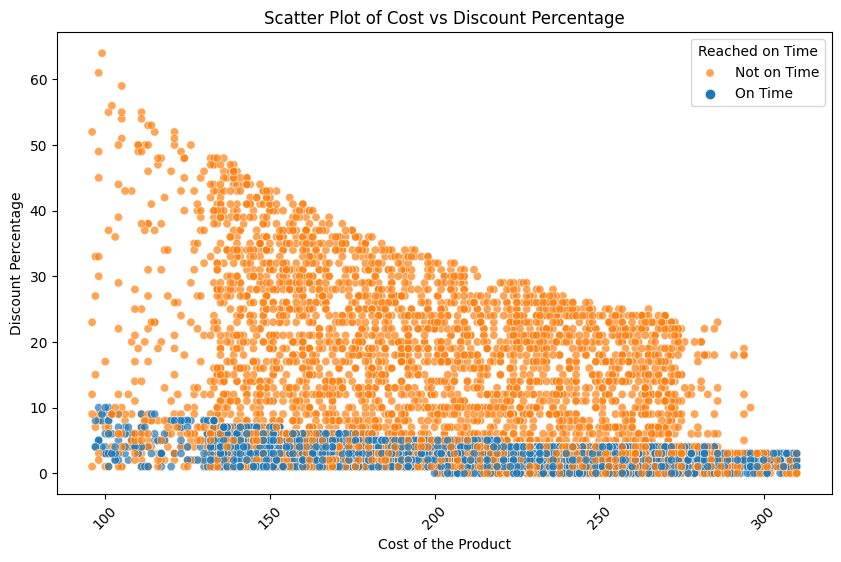

In [1608]:

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_shipping, x='Cost_of_the_Product', y='Discount_Perc', hue='Reached.on.Time_Y.N', alpha=0.7)
plt.xlabel('Cost of the Product')
plt.ylabel('Discount Percentage')
plt.title('Scatter Plot of Cost vs Discount Percentage')
plt.legend(title='Reached on Time', labels=['Not on Time', 'On Time'])
plt.xticks(rotation=45)
plt.show()

<!-- Pengguna baru cenderung mendapatkan persentase diskon yang lebih tinggi -->

The less discount percentage obtained, the less cost incurred

### What is the customer care calls based Delivery Speed ?

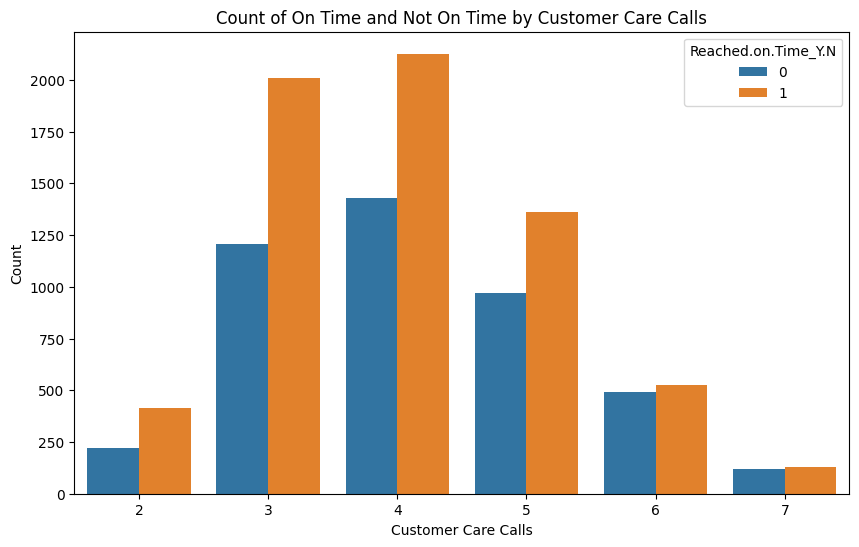

In [1609]:
# Create a barplot to visualize the count of 'Reached.on.Time_Y.N' for each 'Customer_care_calls'
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df_shipping)
plt.title("Count of On Time and Not On Time by Customer Care Calls")
plt.xlabel("Customer Care Calls")
plt.ylabel("Count")
plt.show()

Customer care calls are more frequent when the product does not reach on time compared to when the product does reach on time.

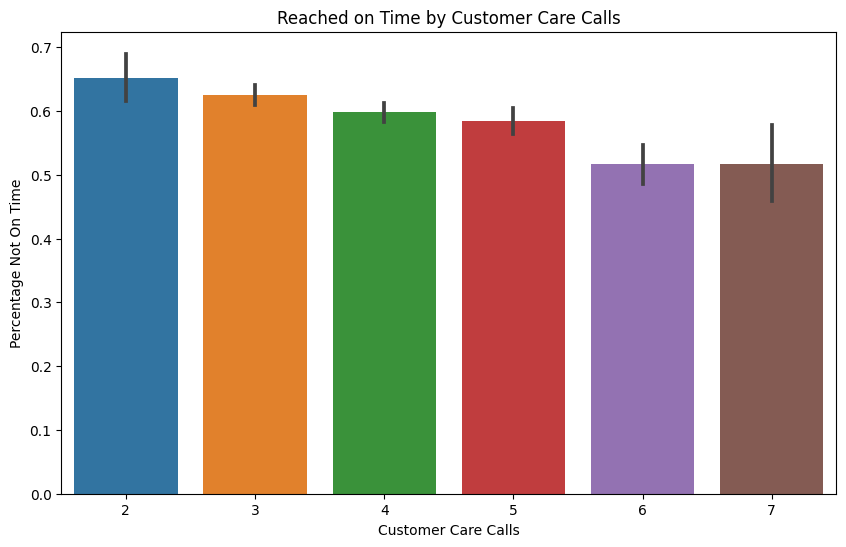

In [1610]:


# Create a barplot to visualize the relationship between customer care calls and reaching on time
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_care_calls', y='Reached.on.Time_Y.N', data=df_shipping)
plt.title("Reached on Time by Customer Care Calls")
plt.xlabel("Customer Care Calls")
plt.ylabel("Percentage Not On Time")
plt.show()


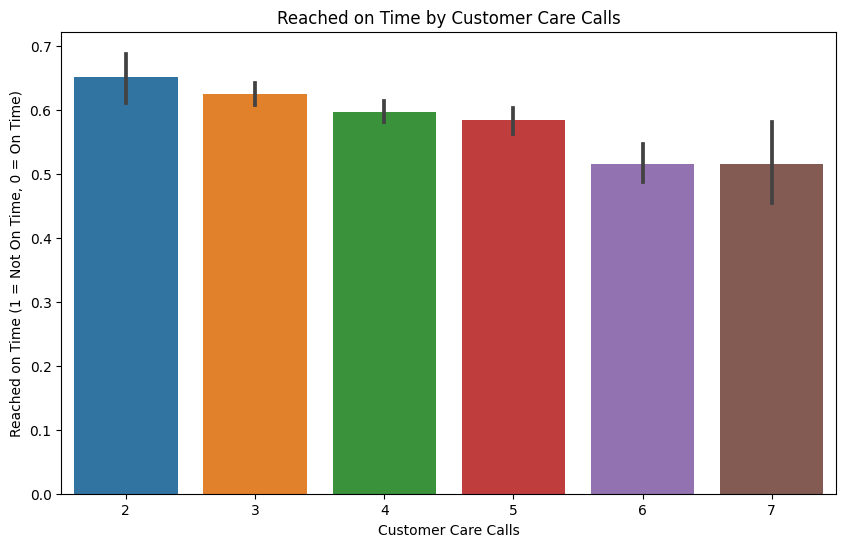

In [1611]:
# Create a barplot to visualize the relationship between customer care calls and reaching on time
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_care_calls', y='Reached.on.Time_Y.N', data=df_shipping)
plt.title("Reached on Time by Customer Care Calls")
plt.xlabel("Customer Care Calls")
plt.ylabel("Reached on Time (1 = Not On Time, 0 = On Time)")
plt.show()


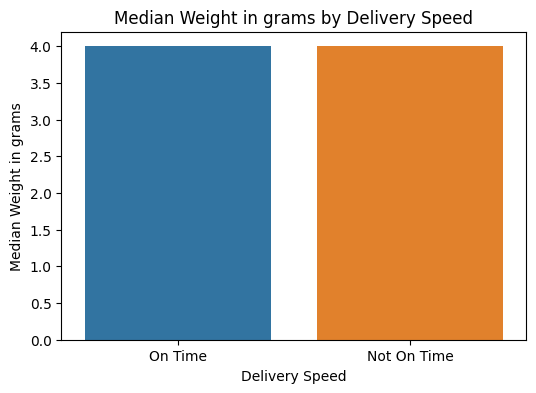

In [1612]:
# Create a barplot to visualize median weight by delivery speed
plt.figure(figsize=(6, 4))
sns.barplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=df_shipping, estimator=np.median)
plt.title("Median Weight in grams by Delivery Speed")
plt.xlabel("Delivery Speed")
plt.ylabel("Median Weight in grams")
plt.xticks([0, 1], ['On Time', 'Not On Time'])
plt.show()


Products with weights between 1000-2000 grams and 4000 - 6000 grams tend to be
on time, while products with weights between 2000 - 4000 grams and over 6000 grams tend to be not on time.


### Data Pre-processing

#### Feature Engineering

##### Rating_Category

In [1613]:
df_shipping['Customer_rating'].unique()

array([2, 5, 3, 1, 4])

In [1614]:
def rating_category(rating):
    if rating >= 1 and rating <= 3:
        return 'Bad'
    elif rating > 3 and rating <= 5:
        return 'Good'
    else:
        return 'No Rating'
df_shipping['Rating_Category']= df_shipping['Customer_rating'].apply(rating_category)

In [1615]:
df_shipping.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc,Rating_Category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,25,Bad
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27,Good


##### Final_Cost

In [1616]:
df_shipping['Final_Cost']=df_shipping['Cost_of_the_Product'] - df_shipping['Discount_offered']

In [1617]:
df_shipping.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc,Rating_Category,Final_Cost
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,25,Bad,133
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27,Good,157


##### Cost_per_kg

In [1618]:
df_shipping['Cost_per_kg'] = round(df_shipping['Cost_of_the_Product'] / (df_shipping['Weight_in_gms']/1000),2)

In [1619]:
df_shipping.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc,Rating_Category,Final_Cost,Cost_per_kg
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,25,Bad,133,143.55
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27,Good,157,69.95


In [1620]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_Perc        10999 non-null  int64  
 13  Rating_Category      10999 non-null  object 
 14  Final_Cost           10999 non-null  int64  
 15  Cost_per_kg          10999 non-null 

<!-- ### Univariate Analysis -->

#### Encoding Handle

In [1621]:
# Dividing column names based on data type
numericals = df_shipping.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df_shipping.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N', 'Discount_Perc', 'Final_Cost', 'Cost_per_kg']
categoricals columns are ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Rating_Category']


In [1623]:
from sklearn.preprocessing import LabelEncoder

In [1624]:
label_encoder = LabelEncoder()

columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Rating_Category']

for column in columns :
  df_shipping[column] = label_encoder.fit_transform(df_shipping[column])

In [1625]:
df_shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc,Rating_Category,Final_Cost,Cost_per_kg
0,1,3,0,4,2,177,3,1,0,44,1233,1,25,0,133,143.55
1,2,4,0,4,5,216,2,1,1,59,3088,1,27,1,157,69.95
2,3,0,0,2,2,183,4,1,1,48,3374,1,26,0,135,54.24
3,4,1,0,3,3,176,4,2,1,10,1177,1,6,0,166,149.53
4,5,2,0,2,2,184,3,2,0,46,2484,1,25,0,138,74.07


In [1626]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  int64  
 2   Mode_of_Shipment     10999 non-null  int64  
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  int64  
 8   Gender               10999 non-null  int64  
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_Perc        10999 non-null  int64  
 13  Rating_Category      10999 non-null  int64  
 14  Final_Cost           10999 non-null  int64  
 15  Cost_per_kg          10999 non-null 

##### Correlation Matrix

<Axes: >

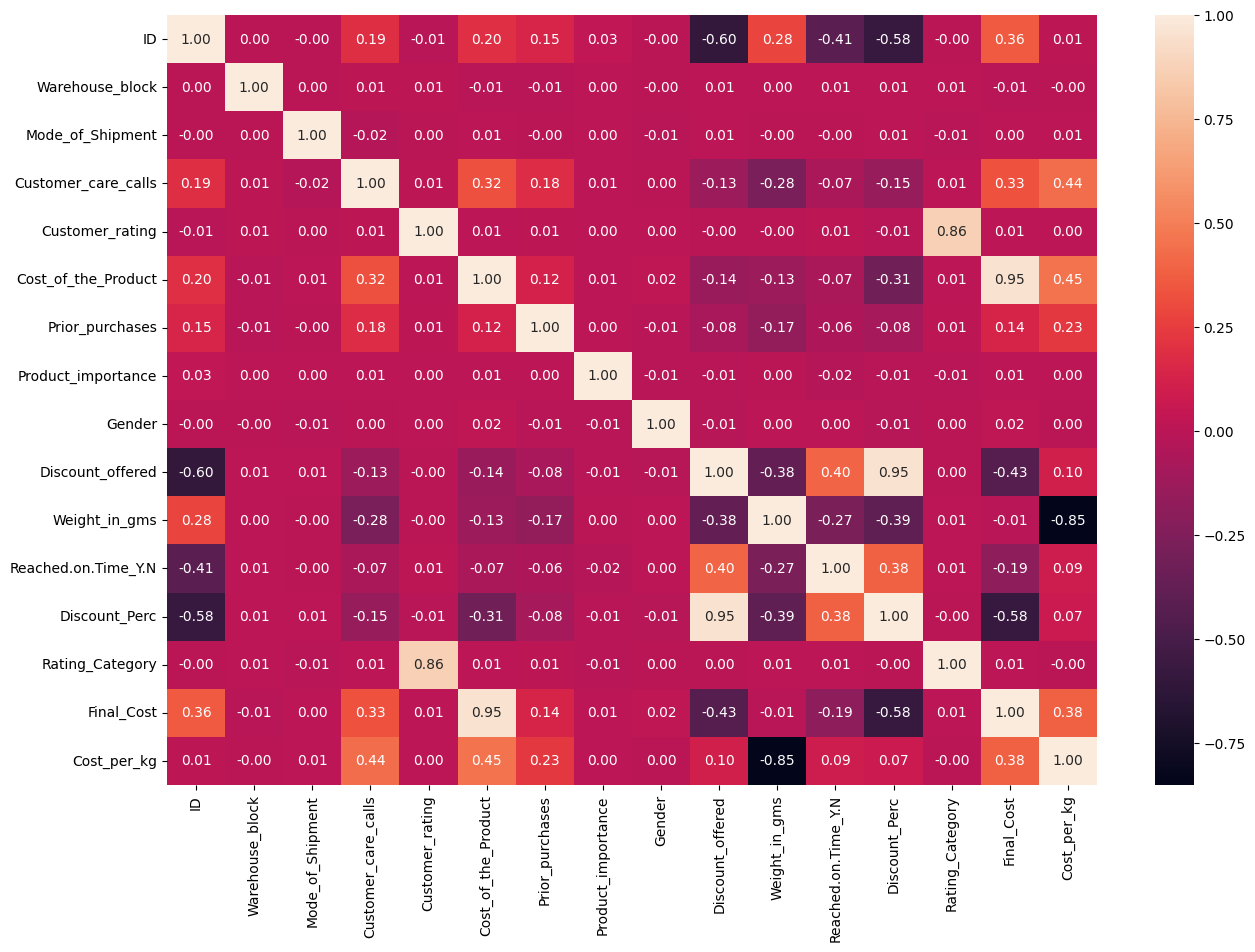

In [1628]:
corr_= df_shipping.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_, annot=True, fmt = ".2f")

Observation:

*  The Final _Cost has a high correlation with the Cost_of_the_Product.
*  The Weight_in_gms has a high  negative correlation with the Cost_per_kg.
*  The Discount_Perc has a high correlation with the Discount_offered.
*  Rating_Category has a high correlation with the Customer_rating.

<!-- - The variable Product_importance_low has a high negative correlation with the variable Product_importance_medium.

- The variable Mode_of_Shipment_Flight has a moderate negative correlation with the variable Mode_of_Shipment_Ship.

- The variable Mode_of_Shipment_Road has a moderate negative correlation with the variable Mode_of_Shipment_Ship. -->

# Modeling and Evaluation (without Imbalance)

In [1630]:
#drop unused feature
df_shipping = df_shipping.drop(['ID'], axis=1)

In [1631]:
df_numeric=df_shipping.select_dtypes(include=np.number)

In [1632]:
df_numeric.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_Perc,Rating_Category,Final_Cost,Cost_per_kg
0,3,0,4,2,177,3,1,0,44,1233,1,25,0,133,143.55
1,4,0,4,5,216,2,1,1,59,3088,1,27,1,157,69.95


In [1633]:
df_shipping['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [1634]:
X = df_numeric.drop(['Reached.on.Time_Y.N'],axis=1) # x : feature
y = df_numeric['Reached.on.Time_Y.N']               #y : target

## Multicollinearity Handling

In [1635]:
# calulcate vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Warehouse_block,1.000899
2,Mode_of_Shipment,1.001963
3,Customer_care_calls,1.315374
4,Customer_rating,3.953764
5,Cost_of_the_Product,inf
6,Prior_purchases,1.075563
7,Product_importance,1.000495
8,Gender,1.000983
9,Discount_offered,inf
10,Weight_in_gms,7.124834


There are several features with high VIF scores:

1. Discount_Perc
2. Weight_in_gms
3. Cost_per_kg

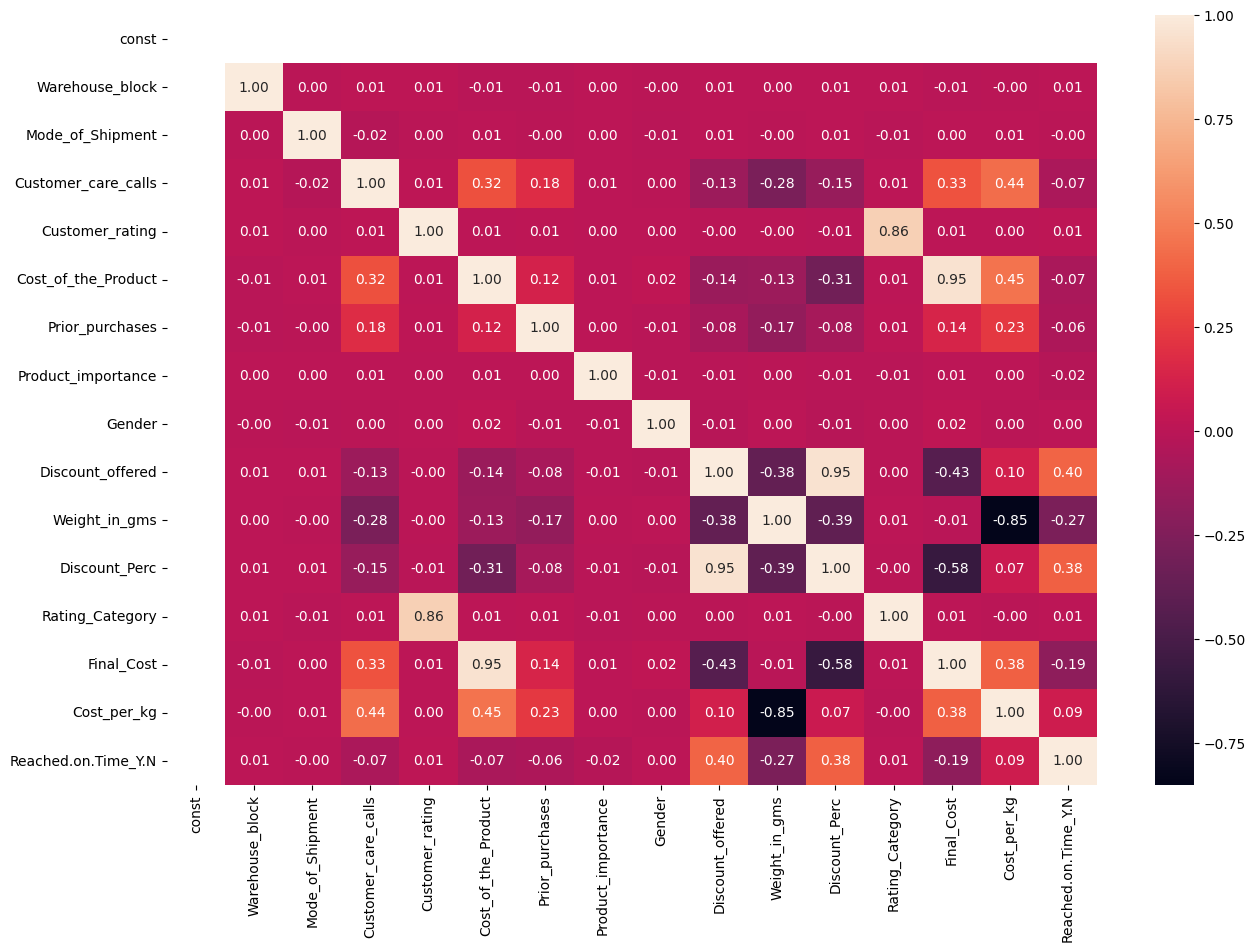

In [1636]:
delivery_train = pd.concat([ X, y], axis=1)
corr = delivery_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

In [1637]:
X = X.drop(columns=['Discount_Perc','Cost_per_kg','Rating_Category'])

In [1638]:
X.head()

,const,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Rating_Category,Final_Cost,Cost_per_kg
0,1.0,3,0,4,2,177,3,1,0,44,0,133,143.55
1,1.0,4,0,4,5,216,2,1,1,59,1,157,69.95
2,1.0,0,0,2,2,183,4,1,1,48,0,135,54.24
3,1.0,1,0,3,3,176,4,2,1,10,0,166,149.53
4,1.0,2,0,2,2,184,3,2,0,46,0,138,74.07


In [1639]:
# # calulcate final vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Warehouse_block,1.000725
2,Mode_of_Shipment,1.001406
3,Customer_care_calls,1.310996
4,Customer_rating,3.953364
5,Cost_of_the_Product,inf
6,Prior_purchases,1.075431
7,Product_importance,1.000485
8,Gender,1.000897
9,Discount_offered,inf
10,Rating_Category,3.953339


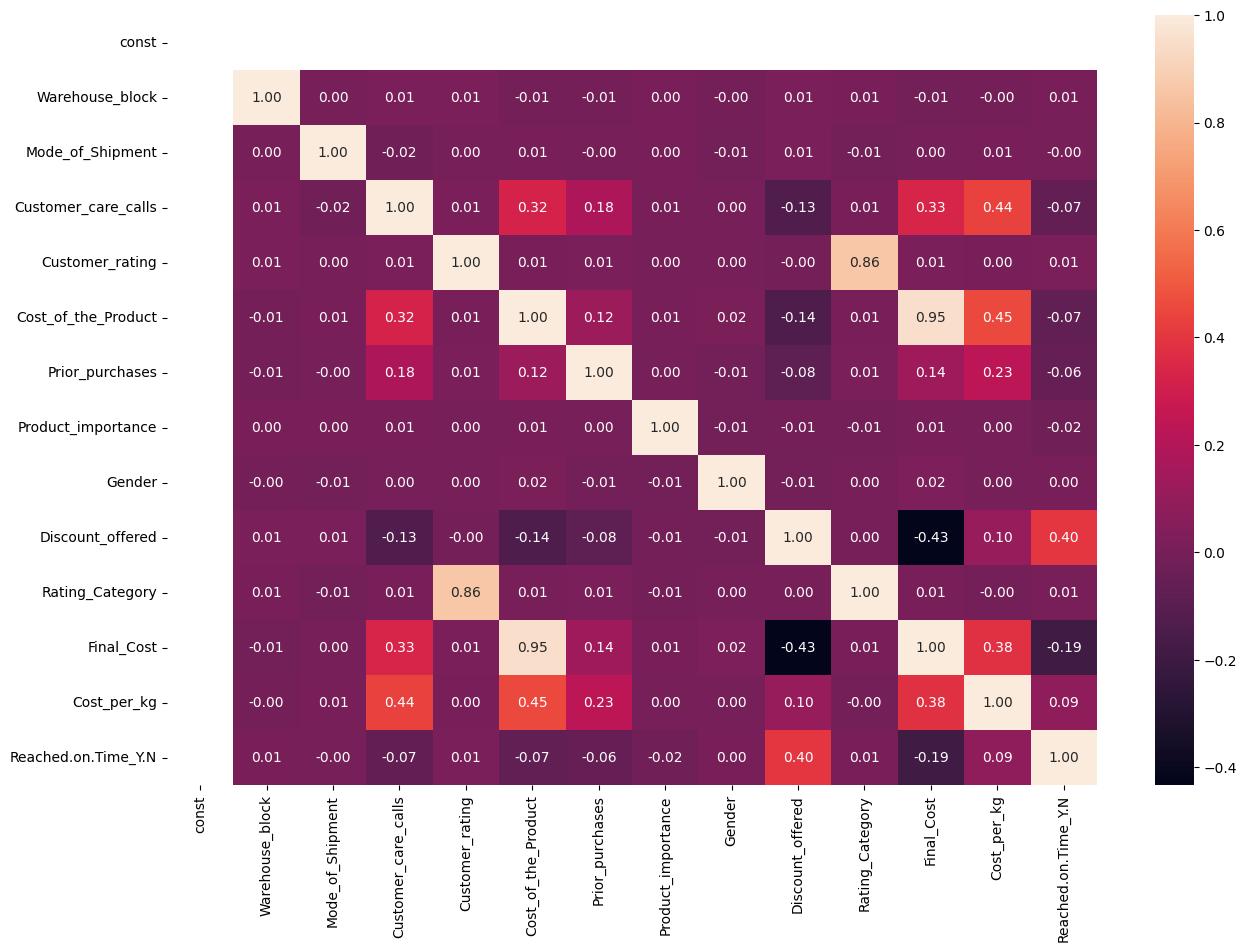

In [1640]:
delivery_train = pd.concat([ X, y], axis=1)
corr = delivery_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

## Split train and test

In [1641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## All Models

focus metric : Precision
<!-- - Dari penjelasan sebelumnya (diawal2), saya lihat dari distribusi kelas 1 lebih banyak dari kelas 0 sehingga untuk menghindari prediksi yg condong pada kelas 1 (mengakibatkan FP meningkat) maka saya fokusnya ke presisi -->

"The distribution of class 1 is higher than class 0, hence to avoid biased predictions towards class 1 (resulting in increased false positives), the focus is on precision."

In [1642]:
#==== Set Up model ====
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
rf  = RandomForestClassifier(random_state=42)
lg  = LogisticRegression(random_state=42)
dc = DecisionTreeClassifier(random_state=42)

In [1643]:
list_model = [
                rf,
                xgb,
                lgb,
                lg,
                dc
]

df = pd.DataFrame(columns = ['Method','Precision Train','Precision Test','Classification Report'])

for model in list_model:
    model.fit(X_train,y_train)
    # y_pred = model.predict(X_test)
    # method = str(type(model)).split('.')[-1][:-2]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]


    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    c_report = classification_report(y_test, y_test_pred, digits=4)


    df = df.append({'Method': method,
                    'Precision Train' : precision_train,
                    'Precision Test'  : precision_test,
                    'Classification Report': c_report},
                     ignore_index=True)

[LightGBM] [Info] Number of positive: 5258, number of negative: 3541
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initscore=0.395342
[LightGBM] [Info] Start training from score 0.395342


In [1644]:
df

,Method,Precision Train,Precision Test,Classification Report
0,RandomForestClassifier,1.000000,0.753597,precision recall f1-score ...
1,XGBClassifier,0.949597,0.735800,precision recall f1-score ...
2,LGBMClassifier,0.939464,0.775930,precision recall f1-score ...
3,LogisticRegression,0.688979,0.667656,precision recall f1-score ...
4,DecisionTreeClassifier,1.000000,0.693659,precision recall f1-score ...


### Random Forest

In [1645]:
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [1646]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [1647]:
precision = precision_score(y_test, y_pred_rf)

In [1648]:
# Tampilkan classification report
report = classification_report(y_test, y_pred_rf,digits=6)

In [1649]:
print(conf_matrix)

[[621 274]
 [467 838]]


In [1650]:
print(precision)

0.7535971223021583


In [1651]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.570772  0.693855  0.626324       895
           1   0.753597  0.642146  0.693422      1305

    accuracy                       0.663182      2200
   macro avg   0.662185  0.668000  0.659873      2200
weighted avg   0.679221  0.663182  0.666125      2200



In [1652]:
# print(classification_report(y_test, y_pred_rf, digits=6))

### Logistic Regression

In [1653]:
lg.fit(X_train,y_train)
y_pred_lg=lg.predict(X_test)

In [1654]:
conf_matrix = confusion_matrix(y_test, y_pred_lg)

In [1655]:
precision = precision_score(y_test, y_pred_lg)

In [1656]:
report = classification_report(y_test, y_pred_lg,digits=6)

In [1657]:
print(conf_matrix)

[[447 448]
 [405 900]]


In [1658]:
print(precision)

0.6676557863501483


In [1659]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.524648  0.499441  0.511734       895
           1   0.667656  0.689655  0.678477      1305

    accuracy                       0.612273      2200
   macro avg   0.596152  0.594548  0.595106      2200
weighted avg   0.609478  0.612273  0.610643      2200



In [1660]:
# print(classification_report(y_test, y_pred_lg, digits=6))

### XGBoost

In [1661]:
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [1662]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

In [1663]:
precision = precision_score(y_test, y_pred_xgb)

In [1664]:
# Tampilkan classification report
report = classification_report(y_test, y_pred_xgb,digits=6)

In [1665]:
print(conf_matrix)

[[588 307]
 [450 855]]


In [1666]:
print(precision)

0.7358003442340791


In [1667]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.566474  0.656983  0.608381       895
           1   0.735800  0.655172  0.693150      1305

    accuracy                       0.655909      2200
   macro avg   0.651137  0.656078  0.650765      2200
weighted avg   0.666915  0.655909  0.658664      2200



In [1668]:
# print(classification_report(y_test, y_pred_xgb, digits=6))

### Light GBM

In [1669]:
lgb.fit(X_train,y_train)
y_pred_lgb=lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 5258, number of negative: 3541
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initscore=0.395342
[LightGBM] [Info] Start training from score 0.395342


In [1670]:
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

In [1671]:
precision = precision_score(y_test, y_pred_lgb)

In [1672]:
# Tampilkan classification report
report = classification_report(y_test, y_pred_lgb,digits=6)

In [1673]:
print(conf_matrix)

[[666 229]
 [512 793]]


In [1674]:
print(precision)

0.7759295499021527


In [1675]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.565365  0.744134  0.642547       895
           1   0.775930  0.607663  0.681564      1305

    accuracy                       0.663182      2200
   macro avg   0.670647  0.675898  0.662056      2200
weighted avg   0.690268  0.663182  0.665691      2200



### Observation

"Random Forest and Light GBM perform better than other models because they have a larger test precision compared to the others."


<!-- Model terbaik adalah Logistic Regression karena memiliki tingkat recall yang lebih tinggi dibandingkan model lain.
The best model in the modeling is "LGBM Classifier" because it has a higher precision rate compared to other models.

<!-- model kita mengalami sedikit kenaikan performa dimana pada baseline sebesar 66.55% dan mengalami kenaikan pada modeling menjadi 68.06%.  Ini berarti model logistic regression mengalami peningkatan dalam kemampuannya untuk membuat prediksi yang lebih akurat setelah melalui proses pengembangan atau pemodelan.  -->
<!-- The model experienced a bad improvement in performance, where the baseline was 77.54%, and after modeling, it decreased to 76.88%. This means that the LGBM Classifier model has not improved in its ability after undergoing development or modeling processes. -->
<!-- The model experienced a bad improvement in performance, where the baseline was 77.54%, and after modeling, it increased to 78.35%. This means that the LGBM Classifier model has little bit improved in its ability after undergoing development or modeling processes. -->

## HyperParameter Tuning

### Logistic Regression with RandomSearchCV

In [1676]:
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=10),  # Distribusi acak untuk C dari 0 hingga 10
    'solver': ['liblinear', 'saga']
}

model_logistic_regression = LogisticRegression(random_state=42)

random_search_logistic_regression = RandomizedSearchCV(
    model_logistic_regression,
    param_distributions=param_dist,
    n_iter=100,  # Jumlah iterasi acak yang akan dijalankan
    cv=5,
    scoring='precision',
    random_state=42
)

random_search_logistic_regression.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a28e817f4f0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='precision')

In [1677]:
random_search_logistic_regression.best_estimator_

LogisticRegression(C=3.1800347497186388, penalty='l1', random_state=42,
                   solver='liblinear')

In [1678]:
model_lg = random_search_logistic_regression.best_estimator_
model_lg.fit(X_train,y_train)

predict_train = model_lg.predict(X_train)
predict_test = model_lg.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

\

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)


print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.6915977696596808
precision_test : 0.6676470588235294
Confusion matrix train:
 [[1937 1604]
 [1661 3597]]
Confusion matrix test:
 [[443 452]
 [397 908]]


In [1679]:
df_metrics_results_lg = pd.DataFrame({
                                   'precision_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1680]:
df_metrics_results_lg

,precision_train,precision_test
0,0.691598,0.667647


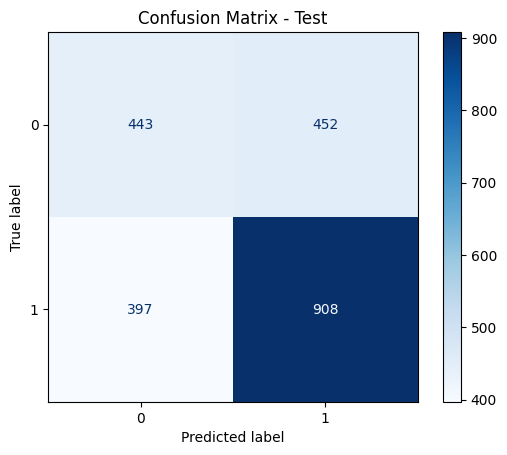

In [1681]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1682]:
classification_report_test = classification_report(y_test, predict_test,digits=6)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0   0.527381  0.494972  0.510663       895
           1   0.667647  0.695785  0.681426      1305

    accuracy                       0.614091      2200
   macro avg   0.597514  0.595379  0.596044      2200
weighted avg   0.610584  0.614091  0.611956      2200



 <!-- dari seluruh produk yang sebenarnya tidak tiba tepat waktu, model kita hanya berhasil mendeteksi / menangkap 70.61% diantaranya.

 Out of all the products that were actually not delivered on time, our model was able to successfully detect/capture only 70.36% of them.

 <!-- Dari 100 pengiriman yang ‘not reached on time’, model kita hanya berhasil mendeteksi/ menangka 70 diantaranya -->
<!--
 Out of 100 deliveries that were not reached on time, our model was only able to successfully detect/capture 70 of them. -->

### LightGBM with RandomSearchCV

In [1683]:
param_grid = [
    {'learning_rate': [0.1, 0.2, 0.3],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5],
     'subsample': [0.7, 0.8, 0.9, 1],
     'min_child_samples': [10, 20, 30]}
]

model_LGBM = LGBMClassifier(random_state=42)

random_search_LGBM = RandomizedSearchCV(model_LGBM, param_grid, cv=5, scoring='precision')
random_search_LGBM.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                   param_distributions=[{'learning_rate': [0.1, 0.2, 0.3],
                                         'max_depth': [3, 4, 5],
                                         'min_child_samples': [10, 20, 30],
                                         'n_estimators': [100, 200, 300],
                                         'subsample': [0.7, 0.8, 0.9, 1]}],
                   scoring='precision')

In [1684]:
random_search_LGBM.best_estimator_

LGBMClassifier(max_depth=3, random_state=42, subsample=0.9)

In [1685]:
print(random_search_LGBM.best_params_)

{'subsample': 0.9, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.1}


In [1686]:
model_lgbm = random_search_LGBM.best_estimator_
model_lgbm.fit(X_train,y_train)

predict_train = model_lgbm.predict(X_train)
predict_test = model_lgbm.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)


print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

[LightGBM] [Info] Number of positive: 5258, number of negative: 3541
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initscore=0.395342
[LightGBM] [Info] Start training from score 0.395342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [1687]:
df_metrics_results_lgb = pd.DataFrame({'precision_train':precision_score_train,
                                   'precision_test ': precision_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1688]:
df_metrics_results_lgb

,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,0.911548,0.864078,0.564473,0.545594,0.697205,0.668859


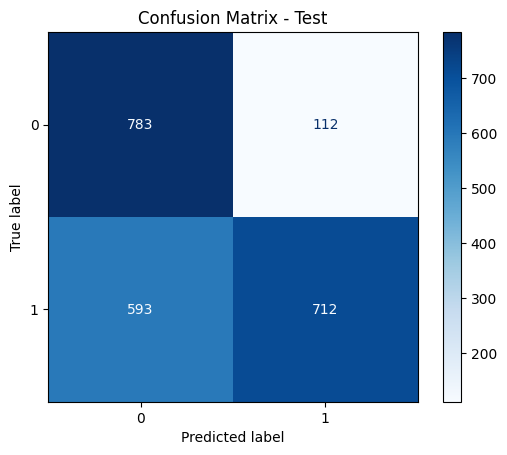

In [1689]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1690]:
classification_report_test = classification_report(y_test, predict_test)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.57      0.87      0.69       895
           1       0.86      0.55      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.74      0.68      0.68      2200



### Random Forest with RandomSearchCV

In [1691]:
param_grid = [
    {'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'bootstrap': [True, False]}
]

model_random_forest = RandomForestClassifier()

random_search_random_forest = RandomizedSearchCV(model_random_forest, param_grid, cv=5, scoring='precision')
random_search_random_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [3, 4, 5, None],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 200, 300]}],
                   scoring='precision')

In [1692]:
random_search_random_forest.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200)

In [1693]:
model_rf = random_search_random_forest.best_estimator_
model_rf.fit(X_train,y_train)

predict_train = model_rf.predict(X_train)
predict_test = model_rf.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.9254966887417219
precision_test : 0.9028871391076115
recall_train : 0.5315709395207303
recall_test: 0.5272030651340996
f1_train : 0.6752838849963759
f1_test : 0.6656990807934204
Confusion matrix train:
 [[3316  225]
 [2463 2795]]
Confusion matrix test:
 [[821  74]
 [617 688]]


In [1694]:
df_metrics_results_rf = pd.DataFrame({
                                   'precision_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1695]:
df_metrics_results_rf

,precision_train,precision_test
0,0.925497,0.902887


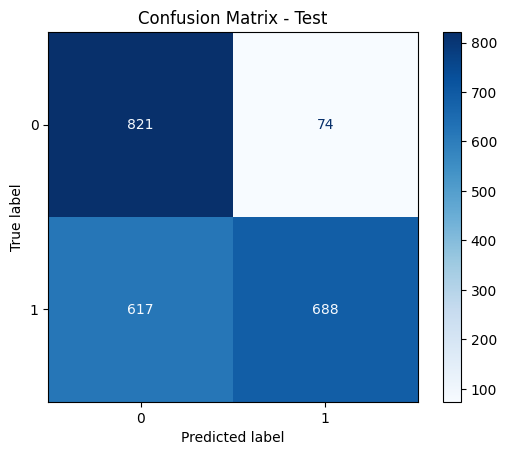

In [1696]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1697]:
classification_report_test = classification_report(y_test, predict_test,digits=4)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0     0.5709    0.9173    0.7038       895
           1     0.9029    0.5272    0.6657      1305

    accuracy                         0.6859      2200
   macro avg     0.7369    0.7223    0.6848      2200
weighted avg     0.7678    0.6859    0.6812      2200



### XGBoost with RandomSearchCV

In [1698]:
    #  'min_child_weight': [1, 2, 3]

In [1699]:
param_grid = [
    {'learning_rate': [0.1, 0.2, 0.3],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5],
     'subsample': [0.7, 0.8, 0.9, 1],
     'min_child_weight': [1, 2, 3]}
]

model_XGB = XGBClassifier(random_state=42)

random_search_XGB = RandomizedSearchCV(model_XGB, param_grid, cv=5, scoring='precision')
random_search_XGB.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions=[{'learning_rate': [0.1, 0.2, 0.3],
                                         'max_depth': [3, 4, 5],
                                         'min_child_weight': [1, 2, 3],
                                         'n_estimators': [100, 200, 300],
                                         'subsample': [0.7, 0.8, 0.9, 1]}],
                   scoring='precision')

In [1700]:
random_search_XGB.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [1701]:
print(random_search_XGB.best_params_)

{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1}


In [1702]:
model_xgb = random_search_XGB.best_estimator_
model_xgb.fit(X_train,y_train)

predict_train = model_xgb.predict(X_train)
predict_test = model_xgb.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.8939970717423134
precision_test : 0.8491228070175438
recall_train : 0.5806390262457208
recall_test: 0.5563218390804597
f1_train : 0.7040239824743457
f1_test : 0.672222222222222
Confusion matrix train:
 [[3179  362]
 [2205 3053]]
Confusion matrix test:
 [[766 129]
 [579 726]]


In [1703]:
df_metrics_results_xgb = pd.DataFrame({
                                   'precsion_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1704]:
df_metrics_results_xgb

,precsion_train,precision_test
0,0.893997,0.849123


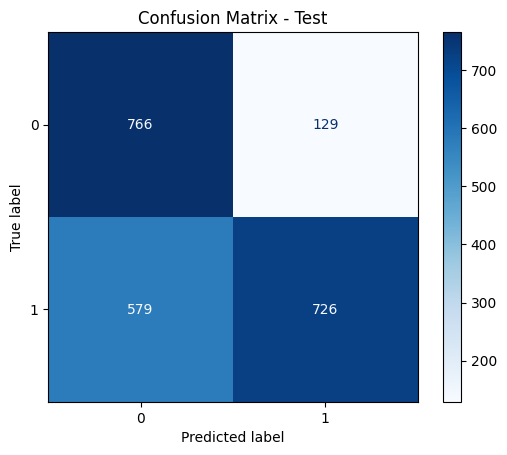

In [1705]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1706]:
classification_report_test = classification_report(y_test, predict_test,digits=4)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0     0.5695    0.8559    0.6839       895
           1     0.8491    0.5563    0.6722      1305

    accuracy                         0.6782      2200
   macro avg     0.7093    0.7061    0.6781      2200
weighted avg     0.7354    0.6782    0.6770      2200



### Best Model after Tuning

Best Model after Tuning is Random Forest

### Feature Importance

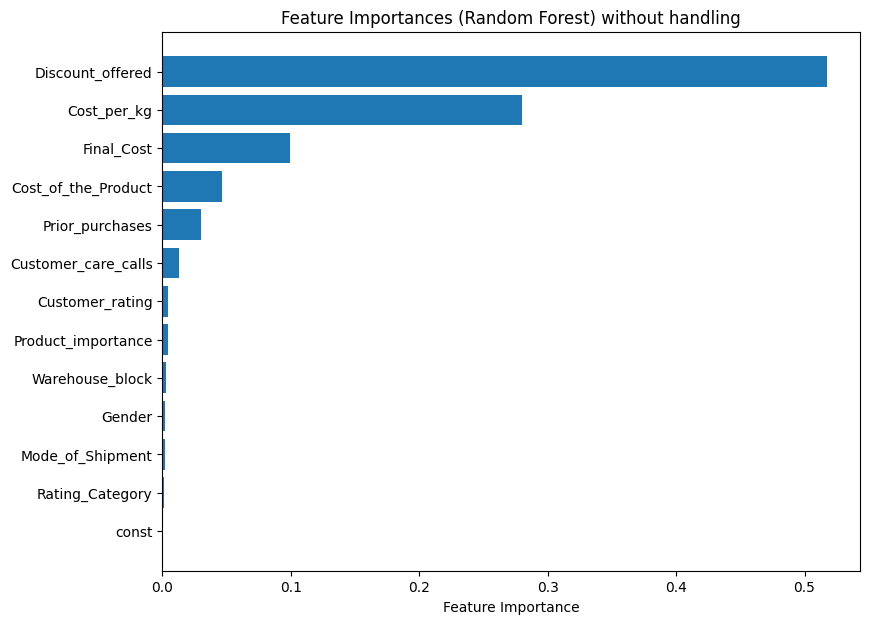

In [1707]:

feature_importances = model_rf.feature_importances_

feature_names = X.columns

sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(9, 7))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Random Forest) without handling')
plt.show()

# Modeling with Imbalance Handling (SMOTE)

In [1709]:
df_shipping['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [1710]:
df_numeric=df_shipping.select_dtypes(include=np.number)
X = df_numeric.drop(['Reached.on.Time_Y.N'],axis=1) # x : feature
y = df_numeric['Reached.on.Time_Y.N']               #y : target

## Multicollinearity Handling

In [1711]:
# calulcate vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Warehouse_block,1.000899
2,Mode_of_Shipment,1.001963
3,Customer_care_calls,1.315374
4,Customer_rating,3.953764
5,Cost_of_the_Product,inf
6,Prior_purchases,1.075563
7,Product_importance,1.000495
8,Gender,1.000983
9,Discount_offered,inf
10,Weight_in_gms,7.124834


There are several features with high VIF scores:

1. Weight_in_gms
2. Discount_Perc

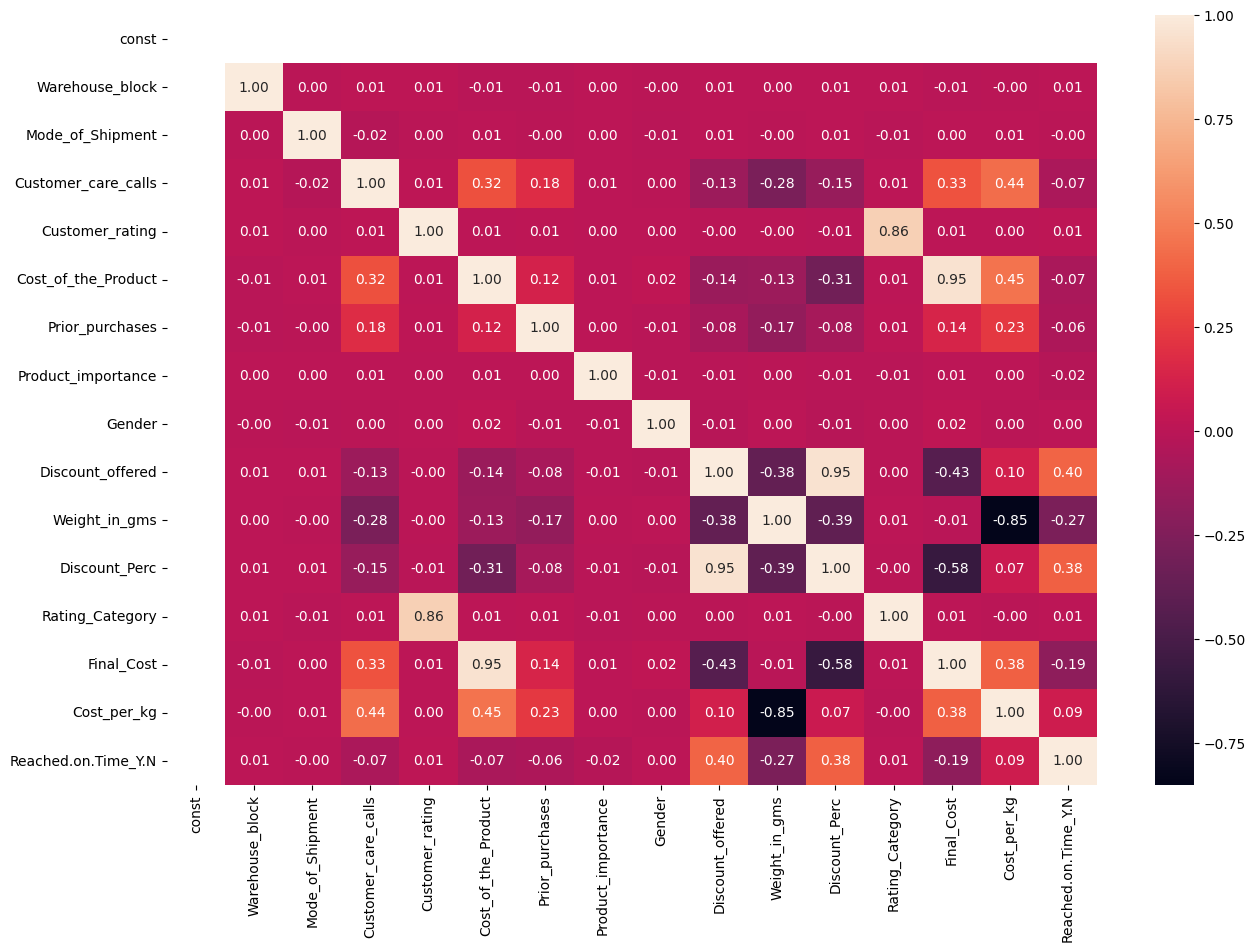

In [1712]:
delivery_train = pd.concat([ X, y], axis=1)
corr = delivery_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

In [1713]:
X = X.drop(columns=['Discount_Perc','Cost_per_kg','Rating_Category'])

In [1714]:
X.head()

,const,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Final_Cost
0,1.0,3,0,4,2,177,3,1,0,44,1233,133
1,1.0,4,0,4,5,216,2,1,1,59,3088,157
2,1.0,0,0,2,2,183,4,1,1,48,3374,135
3,1.0,1,0,3,3,176,4,2,1,10,1177,166
4,1.0,2,0,2,2,184,3,2,0,46,2484,138


In [1715]:
# # calulcate final vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Warehouse_block,1.000807
2,Mode_of_Shipment,1.000837
3,Customer_care_calls,1.260361
4,Customer_rating,1.000431
5,Cost_of_the_Product,inf
6,Prior_purchases,1.070575
7,Product_importance,1.000245
8,Gender,1.000892
9,Discount_offered,inf
10,Weight_in_gms,1.383285


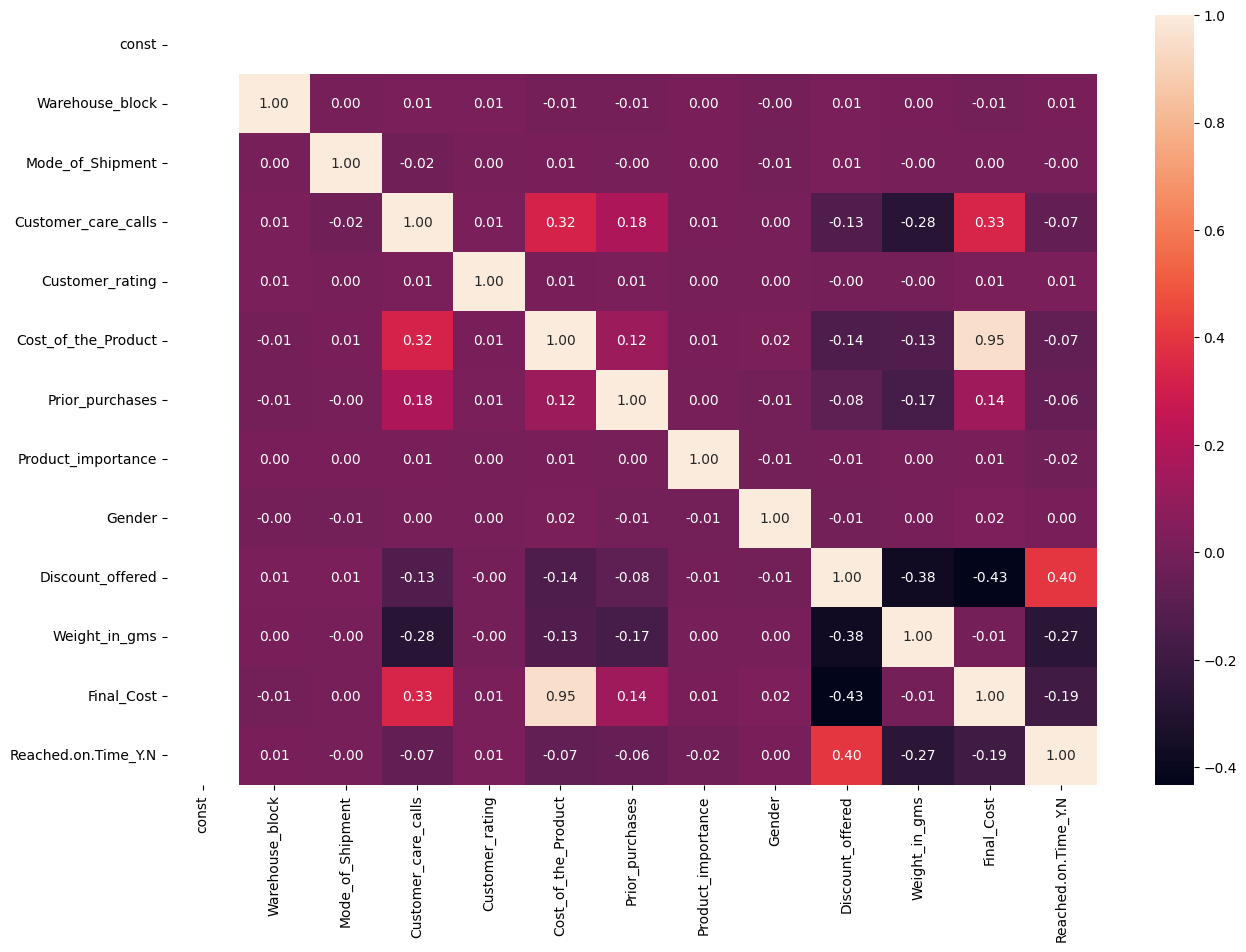

In [1716]:
delivery_train = pd.concat([ X, y], axis=1)
corr = delivery_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

## Split Dataset

In [1717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Imbalance Handling with SMOTE

In [1718]:
X.head()

,const,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Final_Cost
0,1.0,3,0,4,2,177,3,1,0,44,1233,133
1,1.0,4,0,4,5,216,2,1,1,59,3088,157
2,1.0,0,0,2,2,183,4,1,1,48,3374,135
3,1.0,1,0,3,3,176,4,2,1,10,1177,166
4,1.0,2,0,2,2,184,3,2,0,46,2484,138


In [1720]:
from imblearn import under_sampling, over_sampling

In [1721]:
# oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)


In [1724]:
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)

,const,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Final_Cost,Reached.on.Time_Y.N
0,1.0,3,1,4,1,261,2,2,0,9,4158,252,0
1,1.0,4,2,3,3,162,2,1,0,26,1659,136,1
2,1.0,1,2,3,2,221,2,2,1,9,4466,212,0


In [1725]:
df_oversampling_smote['Reached.on.Time_Y.N'].value_counts() # sudah sama outputnya

0    5250
1    5250
Name: Reached.on.Time_Y.N, dtype: int64

## Modeling

focus metric : Precision

<!--
We want to use recall because we want to focus on False Negatives (FN). We want to know how well our model detects products that are actually not delivered on time out of all the products that are actually not delivered on time. -->

<!-- Kita ingin menggunakan recall karena ingin focus ke False Negatif (FN). Kita ingin mengetahui seberapa baik model kita dalam mendeteksi produk yang sebenarnya tidak tiba tepat waktu dari seluruh produk yang sebenarnya tidak tiba tepat waktu -->

In [1726]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [1727]:
#==== Set Up model ====
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
rf  = RandomForestClassifier(random_state=42)
lg  = LogisticRegression(random_state=42)
dc = DecisionTreeClassifier(random_state=42)

In [1728]:
list_model = [
                rf,
                xgb,
                lgb,
                lg,
                dc
]

df = pd.DataFrame(columns = ['Method','Precision Train', 'Precision Test', 'Classification Report'])

for model in list_model:
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]


    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    c_report = classification_report(y_test, y_test_pred, digits=4)

    df = df.append({'Method': method,
                    'Precision Train': precision_train,
                    'Precision Test': precision_test,
                    'Classification Report': c_report},
                     ignore_index=True)

[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562


In [1730]:
df

,Method,Precision Train,Precision Test,Classification Report
0,RandomForestClassifier,1.000000,0.763584,precision recall f1-score ...
1,XGBClassifier,0.963705,0.738408,precision recall f1-score ...
2,LGBMClassifier,0.948700,0.778680,precision recall f1-score ...
3,LogisticRegression,0.703976,0.700800,precision recall f1-score ...
4,DecisionTreeClassifier,1.000000,0.704969,precision recall f1-score ...


In [1732]:
# df

## Random Forest

In [1733]:
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [1734]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [1735]:
precision = precision_score(y_test, y_pred_rf)

In [1736]:

report = classification_report(y_test, y_pred_rf,digits=6)

In [1737]:
print(conf_matrix)

[[639 248]
 [512 801]]


In [1738]:
print(precision)

0.763584366062917


In [1739]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.555169  0.720406  0.627085       887
           1   0.763584  0.610053  0.678239      1313

    accuracy                       0.654545      2200
   macro avg   0.659377  0.665230  0.652662      2200
weighted avg   0.679555  0.654545  0.657615      2200



## Logistic Regression

In [1741]:
lg.fit(X_train,y_train)
y_pred_lg=lg.predict(X_test)

In [1742]:
conf_matrix = confusion_matrix(y_test, y_pred_lg)

In [1743]:
precision = precision_score(y_test, y_pred_lg)

In [1744]:
report = classification_report(y_test, y_pred_lg,digits=6)

In [1745]:
print(conf_matrix)

[[513 374]
 [437 876]]


In [1746]:
print(precision)

0.7008


In [1747]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.540000  0.578354  0.558519       887
           1   0.700800  0.667174  0.683574      1313

    accuracy                       0.631364      2200
   macro avg   0.620400  0.622764  0.621047      2200
weighted avg   0.635968  0.631364  0.633154      2200



## XGBoost

In [1749]:
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [1750]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

In [1751]:
precision = precision_score(y_test, y_pred_xgb)

In [1752]:

report = classification_report(y_test, y_pred_xgb,digits=6)

In [1753]:
print(conf_matrix)

[[588 299]
 [469 844]]


In [1754]:
print(precision)

0.7384076990376203


In [1755]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.556291  0.662909  0.604938       887
           1   0.738408  0.642803  0.687296      1313

    accuracy                       0.650909      2200
   macro avg   0.647350  0.652856  0.646117      2200
weighted avg   0.664982  0.650909  0.654091      2200



## Light GBM

In [1757]:
lgb.fit(X_train,y_train)
y_pred_lgb=lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562


In [1758]:
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

In [1759]:
precision = precision_score(y_test, y_pred_lgb)

In [1760]:

report = classification_report(y_test, y_pred_lgb,digits=6)

In [1761]:
print(conf_matrix)

[[669 218]
 [546 767]]


In [1762]:
print(precision)

0.7786802030456853


In [1763]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0   0.550617  0.754228  0.636537       887
           1   0.778680  0.584158  0.667537      1313

    accuracy                       0.652727      2200
   macro avg   0.664649  0.669193  0.652037      2200
weighted avg   0.686729  0.652727  0.655038      2200



## Observation

"Random Forest and Light GBM perform better than other models because they have a larger test precision compared to the others."

## Cross Validation

In [1764]:
from sklearn.model_selection import cross_val_score

#### Light GBM

In [1765]:
# scores = cross_val_score(lg, X_std, y, cv=10, scoring='recall')

In [1766]:
scores = cross_val_score(lgb, X, y, cv=5, scoring='precision')

[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] [bin

In [1767]:
scores

array([0.7427762 , 0.74263039, 0.71575342, 0.55263158, 0.59927798])

## HyperParameter Tuning

### Logistic Regression with RandomSearchCV

In [1768]:
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=10),  # Distribusi acak untuk C dari 0 hingga 10
    'solver': ['liblinear', 'saga']
}

model_logistic_regression = LogisticRegression(random_state=42)

random_search_logistic_regression = RandomizedSearchCV(
    model_logistic_regression,
    param_distributions=param_dist,
    n_iter=100,  # Jumlah iterasi acak yang akan dijalankan
    cv=5,
    scoring='precision',
    random_state=42
)

random_search_logistic_regression.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a28e3adf8e0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='precision')

In [1769]:
random_search_logistic_regression.best_estimator_

LogisticRegression(C=0.06952130531190703, random_state=42, solver='liblinear')

In [1770]:
model_lg = random_search_logistic_regression.best_estimator_
model_lg.fit(X_train,y_train)

predict_train = model_lg.predict(X_train)
predict_test = model_lg.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.7090657712818487
precision_test : 0.7031125299281724
Confusion matrix train:
 [[2076 1473]
 [1660 3590]]
Confusion matrix test:
 [[515 372]
 [432 881]]


In [1771]:
df_metrics_results_grid_lg = pd.DataFrame({
                                   'precision_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])

In [1772]:
df_metrics_results_grid_lg

,precision_train,precision_test
0,0.709066,0.703113


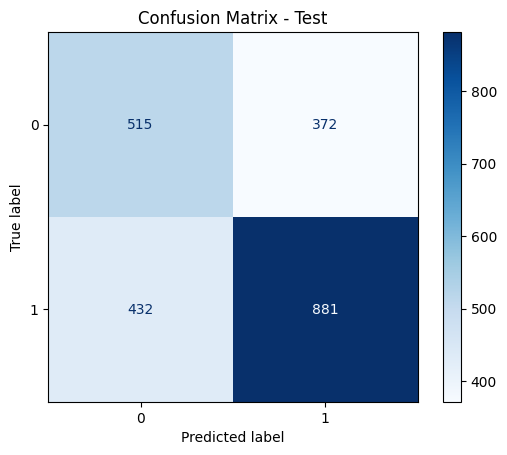

In [1773]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1774]:
classification_report_test = classification_report(y_test, predict_test,digits=6)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0   0.543823  0.580609  0.561614       887
           1   0.703113  0.670982  0.686672      1313

    accuracy                       0.634545      2200
   macro avg   0.623468  0.625796  0.624143      2200
weighted avg   0.638890  0.634545  0.636251      2200



 <!-- dari seluruh produk yang sebenarnya tidak tiba tepat waktu, model kita hanya berhasil mendeteksi / menangkap 70.61% diantaranya.

 Out of all the products that were actually not delivered on time, our model was able to successfully detect/capture only 70.36% of them.

 <!-- Dari 100 pengiriman yang ‘not reached on time’, model kita hanya berhasil mendeteksi/ menangka 70 diantaranya -->
<!--
 Out of 100 deliveries that were not reached on time, our model was only able to successfully detect/capture 70 of them. -->

### LightGBM with RandomSearchCV

In [1775]:
param_grid = [
    {'learning_rate': [0.1, 0.2, 0.3],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5],
     'subsample': [0.7, 0.8, 0.9, 1],
     'min_child_samples': [10, 20, 30]}
]

model_LGBM = LGBMClassifier(random_state=42)

random_search_LGBM = RandomizedSearchCV(model_LGBM, param_grid, cv=5, scoring='precision')
random_search_LGBM.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                   param_distributions=[{'learning_rate': [0.1, 0.2, 0.3],
                                         'max_depth': [3, 4, 5],
                                         'min_child_samples': [10, 20, 30],
                                         'n_estimators': [100, 200, 300],
                                         'subsample': [0.7, 0.8, 0.9, 1]}],
                   scoring='precision')

In [1776]:
random_search_LGBM.best_estimator_

LGBMClassifier(learning_rate=0.3, max_depth=3, min_child_samples=10,
               random_state=42, subsample=0.9)

In [1777]:
print(random_search_LGBM.best_params_)

{'subsample': 0.9, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': 0.3}


In [1778]:
model_lgbm = random_search_LGBM.best_estimator_
model_lgbm.fit(X_train,y_train)

predict_train = model_lgbm.predict(X_train)
predict_test = model_lgbm.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [1779]:
df_metrics_results_grid_lgb = pd.DataFrame({'precision_train':precision_score_train,
                                   'precision_test ': precision_score_test,
                                   'recall_train ':recall_score_train,
                                   'recall_test': recall_score_test,
                                   'f1_train':f1_score_train,
                                   'f1_test':f1_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1780]:
df_metrics_results_grid_lgb

,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,0.883622,0.777096,0.671048,0.578827,0.762802,0.663466


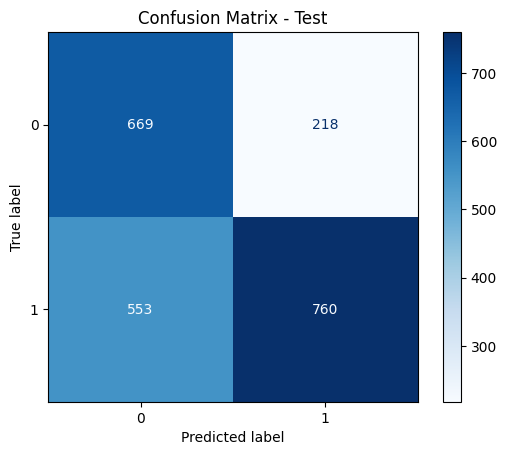

In [1781]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1782]:
classification_report_test = classification_report(y_test, predict_test)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63       887
           1       0.78      0.58      0.66      1313

    accuracy                           0.65      2200
   macro avg       0.66      0.67      0.65      2200
weighted avg       0.68      0.65      0.65      2200



### Random Forest with RandomSearchCV

In [1783]:
param_grid = [
    {'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'bootstrap': [True, False]}
]

model_random_forest = RandomForestClassifier()

random_search_random_forest = RandomizedSearchCV(model_random_forest, param_grid, cv=5, scoring='precision')
random_search_random_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [3, 4, 5, None],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 200, 300]}],
                   scoring='precision')

In [1784]:
random_search_random_forest.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [1785]:
model_rf = random_search_random_forest.best_estimator_
model_rf.fit(X_train,y_train)

predict_train = model_rf.predict(X_train)
predict_test = model_rf.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.9569241723033108
precision_test : 0.9547511312217195
recall_train : 0.512
recall_test: 0.4821020563594821
f1_train : 0.6670802829135128
f1_test : 0.6406882591093118
Confusion matrix train:
 [[3428  121]
 [2562 2688]]
Confusion matrix test:
 [[857  30]
 [680 633]]


In [1786]:
df_metrics_results_grid_rf = pd.DataFrame({
                                   'precision_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])  # Menambahkan indeks dengan nilai 0

In [1787]:
df_metrics_results_grid_rf

,precision_train,precision_test
0,0.956924,0.954751


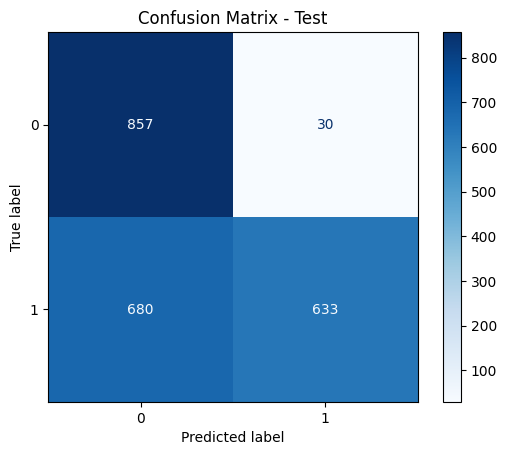

In [1788]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1789]:
classification_report_test = classification_report(y_test, predict_test,digits=4)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0     0.5576    0.9662    0.7071       887
           1     0.9548    0.4821    0.6407      1313

    accuracy                         0.6773      2200
   macro avg     0.7562    0.7241    0.6739      2200
weighted avg     0.7946    0.6773    0.6675      2200



### XGBoost with RandomSearchCV

In [1791]:
param_grid = [
    {'learning_rate': [0.1, 0.2, 0.3],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5],
     'subsample': [0.7, 0.8, 0.9, 1],
     'min_child_weight': [1, 2, 3]}
]

model_XGB = XGBClassifier(random_state=42)

random_search_XGB = RandomizedSearchCV(model_XGB, param_grid, cv=5, scoring='precision')
random_search_XGB.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions=[{'learning_rate': [0.1, 0.2, 0.3],
                                         'max_depth': [3, 4, 5],
                                         'min_child_weight': [1, 2, 3],
                                         'n_estimators': [100, 200, 300],
                                         'subsample': [0.7, 0.8, 0.9, 1]}],
                   scoring='precision')

In [1792]:
random_search_XGB.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [1793]:
print(random_search_XGB.best_params_)

{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2}


In [1794]:
model_xgb = random_search_XGB.best_estimator_
model_xgb.fit(X_train,y_train)

predict_train = model_xgb.predict(X_train)
predict_test = model_xgb.predict(X_test)

precision_score_train = precision_score(y_train,predict_train)
precision_score_test = precision_score(y_test,predict_test)

recall_score_train = recall_score(y_train,predict_train)
recall_score_test = recall_score(y_test,predict_test)

f1_score_train = f1_score(y_train,predict_train)
f1_score_test = f1_score(y_test,predict_test)

confusion_matrix_train = confusion_matrix(y_train, predict_train)
confusion_matrix_test = confusion_matrix(y_test, predict_test)

print('precision_train :', precision_score_train)
print('precision_test :', precision_score_test)
print('recall_train :',recall_score_train)
print('recall_test:', recall_score_test)
print('f1_train :',f1_score_train)
print('f1_test :',f1_score_test)

print('Confusion matrix train:\n', confusion_matrix_train)
print('Confusion matrix test:\n', confusion_matrix_test)

precision_train : 0.8959677419354839
precision_test : 0.8388195232690124
recall_train : 0.6348571428571429
recall_test: 0.5628332063975628
f1_train : 0.7431438127090302
f1_test : 0.6736554238833181
Confusion matrix train:
 [[3162  387]
 [1917 3333]]
Confusion matrix test:
 [[745 142]
 [574 739]]


In [1795]:
df_metrics_results_grid = pd.DataFrame({
                                   'precsion_train ':precision_score_train,
                                   'precision_test': precision_score_test},
                                  index=[0])

In [1796]:
df_metrics_results_grid

,precsion_train,precision_test
0,0.895968,0.83882


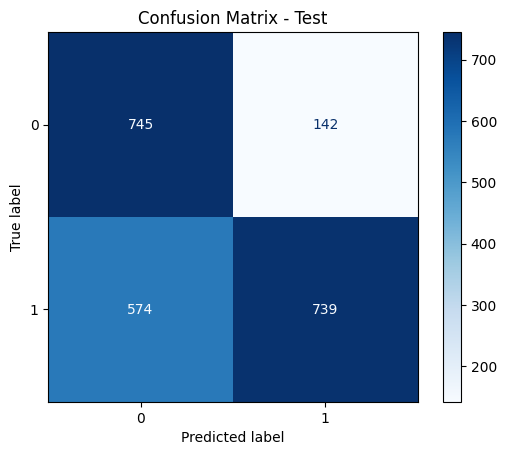

In [1797]:
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test)
cm_display_test.plot(cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.show()

In [1798]:
classification_report_test = classification_report(y_test, predict_test,digits=4)
print('Classification Report - Test:\n', classification_report_test)

Classification Report - Test:
               precision    recall  f1-score   support

           0     0.5648    0.8399    0.6754       887
           1     0.8388    0.5628    0.6737      1313

    accuracy                         0.6745      2200
   macro avg     0.7018    0.7014    0.6745      2200
weighted avg     0.7283    0.6745    0.6744      2200



### Best Model after Tuning

Best Model after Tuning is Random Forest

### Feature Importance

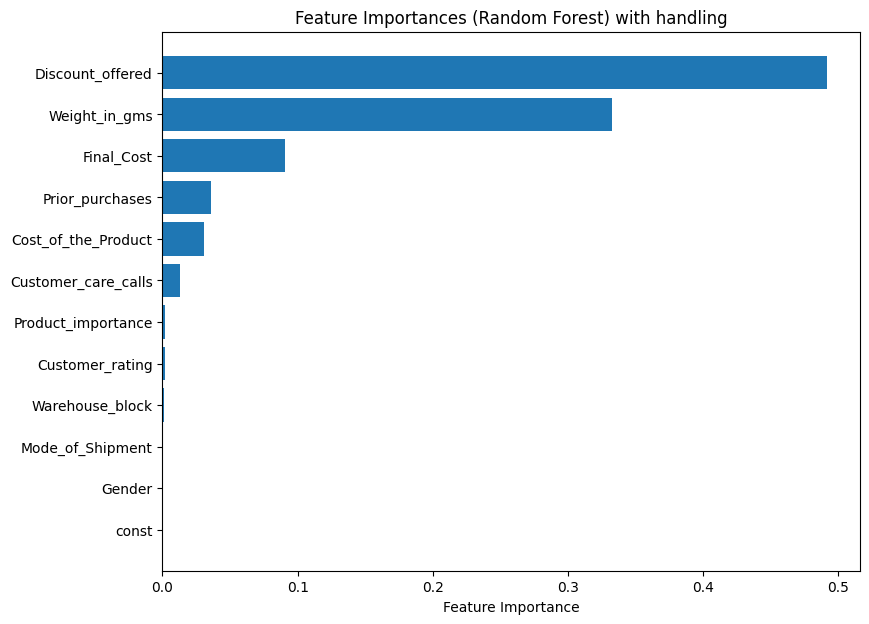

In [1800]:

feature_importances = model_rf.feature_importances_

feature_names = X.columns


sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(9, 7))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Random Forest) with handling')
plt.show()

# Recommendations

<!-- 1. Jika diliat dari hasil feature importance diatas, discount offered mengakibatkan data delay. Karena ketika ada diskon maka pembeli akan fokus ke diskon itu supaya mendapat diskon. Maka jumlah barang yang harus dibeli juga harus ditingkatkan (minimal pembelian 50rb baru dapet diskon + hanya bisa diaplikasikan untuk pengiriman menggunakan sameday).
2. Customer care cols lebih banyak saat barang delay, sehingga interaksi antara pelanggan dengan CS bisa diperhatikan (misalnya pakai orang asli daripada pakai chatbot)
3. Untuk barang-barang high importance bisa diarahkan terhadap pengiriman menggunakan sameday. Misalnya menggunakan penambahan fitur pertanyaan tentang high importance (maka jasa kirim yang muncul hanya sameday) dan ada juga yang tidak ada fitur pertanyaan (maka muncul semua jenis pengiriman).Untuk menguji fitur ini berpengaruh atau tidak terhadap pengiriman dan kepuasan pelanggan maka bisa dilakukan AB testing -->

1. Based on the results from the above feature importance analysis, offering a discount leads to order delays. This is because when a discount is available, buyers tend to focus on the discount to avail it. Consequently, the quantity of items to be purchased needs to be increased (minimum purchase of 50,000 IDR to avail the discount, and it can only be applied for same-day delivery).

2. The number of customer care calls is higher when there's a delay in delivering the product. Therefore, customer interactions with customer service should be emphasized, considering using real people instead of chatbots.

3. For items with high importance, they could be directed towards same-day delivery. For instance, by adding a feature asking about high-importance items (resulting in same-day delivery options), and another without this feature (showing all types of delivery options). To test whether this feature significantly impacts delivery and customer satisfaction, AB testing can be conducted.

# Room for Improvement

1. Utilize a larger dataset : You can either use a larger dataset by sourcing one or downloading a dataset that is more extensive and relevant to your problem.

2. Implement or incorporate additional feature engineering : More relevant feature engineering can be added to solve problems at a more advanced level.


<!-- Setelah membandingkan hasil evaluasi kedua model setelah tuning, dapat dilihat bahwa XGBoost memiliki performa yang lebih baik dibandingkan dengan LightGBM dalam hal beberapa metrik evaluasi yang umum digunakan seperti R2 score, MAE, MSE, dan RMSE.

Pada model XGBoost setelah tuning, terdapat peningkatan nilai R2 score pada data train dan test, serta penurunan nilai MAE, MSE, dan RMSE. Hal ini menunjukkan bahwa model XGBoost mampu menjelaskan lebih banyak variabilitas dalam data dan memiliki kesalahan prediksi yang lebih rendah secara absolut.

Di sisi lain, pada model LightGBM setelah tuning, terdapat sedikit peningkatan nilai R2 score pada data train dan test, namun nilai MAE, MSE, dan RMSE cenderung stabil atau mengalami penurunan yang sangat kecil.

Berdasarkan hasil evaluasi tersebut, dapat disimpulkan bahwa performa yang lebih baik setelah dibandingkan adalah XGBoost setelah tuning. -->